In [25]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
bpdf = pd.read_csv("BritainElectsModel.csv")
for party in ["Lab", "Con", "LDem", "Grn", "SNP", "PC", "Ref", "Ind_Oth"]:
    bpdf[party] = bpdf[party].str[:-1].astype(float)
bpdf.fillna(0, inplace=True)
bpdf.drop(columns="Country", inplace=True)
bpdf.rename(columns={"Win":"BP_Winner", "Con":"BP_Con", "Lab":"BP_Lab", "LDem":"BP_LDem", "Grn":"BP_Grn", "SNP":"BP_SNP", "PC":"BP_PC", "Ref": "BP_Ref", "Ind_Oth":"BP_Other"}, inplace=True)
bpdf["BP_Winner"] = bpdf["BP_Winner"].map({'Lab':'lab', 'Con':'con', 'LDem':'ld', 'Ref':'ref', 'Grn':'grn', 'Oth':'other', 'SNP':'snp', 'PC':'pc', "Oth":"other"})
bpdf.head()

Constituency BP_Winner  BP_Con  BP_Lab  BP_LDem  BP_Grn  \
0                 Aldershot       lab    31.6    32.4     11.5     4.5   
1       Aldridge-Brownhills       con    31.7    29.9      6.7     6.4   
2  Altrincham and Sale West       lab    26.7    46.1      7.1     3.8   
3              Amber Valley       lab    29.3    35.0      6.6     6.9   
4   Arundel and South Downs       con    25.9    21.5     17.8     8.8   

   BP_SNP  BP_PC  BP_Ref  BP_Other  
0     0.0    0.0    15.7       4.2  
1     0.0    0.0    25.4       0.0  
2     0.0    0.0    11.4       4.9  
3     0.0    0.0    22.2       0.0  
4     0.0    0.0    20.6       5.4

In [27]:
edf = pd.read_csv("The Economist Forecast - Sheet1.csv")
edf.drop(columns=["maj", "Unnamed: 11", "Left", "Right"], inplace=True)
edf.fillna(0, inplace=True)
edf.rename(columns={'con':'E_Con', 'lab':'E_Lab', 'ld':'E_LDem', 'ref':"E_Ref", 'grn':'E_Grn', 'snp':'E_SNP', 'pc':'E_PC', 'other':'E_Other', 'winner':'E_Winner'}, inplace=True)
edf.head()

Constituency  E_Con  E_Lab  E_LDem  E_Ref  E_Grn  \
0                    Aberafan Maesteg   10.0   51.0     5.0   17.0    4.0   
1                      Aberdeen North   12.0   26.0     8.0    9.0    4.0   
2                      Aberdeen South   17.0   24.0    10.0    8.0    4.0   
3  Aberdeenshire North and Moray East   30.0   19.0     7.0   11.0    0.0   
4                  Airdrie and Shotts    7.0   44.0     5.0    8.0    0.0   

   E_SNP  E_PC  E_Other E_Winner  
0    0.0  10.0      3.0      lab  
1   37.0   0.0      4.0      snp  
2   33.0   0.0      3.0      snp  
3   33.0   0.0      0.0      snp  
4   33.0   0.0      3.0      lab

In [28]:
emdf = pd.read_csv("Nowcast Public - NOWCAST 30_06.csv")
emdf = emdf[emdf["Region"] != "Northern Ireland"]
emdf = emdf[['Unnamed: 2','Unnamed: 3', 'CON', 'LAB', 'LDM',
       'RFM', 'GRN', 'SNP', 'PLC', 'OTH']]

emdf.drop(index=0, inplace=True)
emdf.rename(columns={'Unnamed: 2':'EM_Winner', 'Unnamed: 3': 'Constituency', 'CON':'EM_Con', 'LAB':'EM_Lab', 'LDM':'EM_LDem', 'RFM':'EM_Ref', 'GRN':'EM_Grn', 'SNP':'EM_SNP', 'PLC':'EM_PC', 'OTH': 'EM_Other'}, inplace=True)
for party in ["EM_Con", "EM_Lab", "EM_LDem", "EM_Ref", "EM_Grn", "EM_SNP", "EM_PC", "EM_Other"]:
    emdf[party] = emdf[party].str[:-1].astype(float)
emdf.fillna(0, inplace=True)
emdf["EM_Winner"] = emdf["EM_Winner"].map({'LAB':'lab', 'CON':'con', 'LDM':'ld', 'RFM':'ref', 'GRN':'grn', 'SPKR':'other', 'SNP':'snp', 'PLC':'pc'})
emdf.head()

EM_Winner              Constituency  EM_Con  EM_Lab  EM_LDem  EM_Ref  \
1       lab                 Aldershot    27.6    34.6     14.1    16.8   
2       con       Aldridge-Brownhills    39.3    32.4      5.0    19.2   
3       lab  Altrincham and Sale West    21.4    48.9      8.2    15.0   
4       lab              Amber Valley    29.2    36.8      4.6    23.9   
5       con   Arundel and South Downs    30.6    21.1     20.0    21.1   

   EM_Grn  EM_SNP  EM_PC  EM_Other  
1     6.3     0.0    0.0       0.5  
2     3.8     0.0    0.0       0.3  
3     5.9     0.0    0.0       0.6  
4     5.4     0.0    0.0       0.1  
5     6.8     0.0    0.0       0.5

In [29]:
ydf = pd.read_csv("YouGov_2024_general_election_MRP_2.csv")
ydf = ydf[['area', 'ConShare', 'LabShare', 'LibDemShare',
       'GreenShare', 'ReformShare', 'PlaidShare', 'SNPShare', 'OthersShare',
       'WinnerGE2024']]
ydf.rename(columns={'area':'Constituency', 'ConShare':'Y_Con', 'LabShare':'Y_Lab', 'LibDemShare':'Y_LDem', 'GreenShare':'Y_Grn', 'ReformShare':'Y_Ref', 'PlaidShare':'Y_PC', 'SNPShare':'Y_SNP', 'OthersShare':'Y_Other', 'WinnerGE2024':'Y_Winner'}, inplace=True)
for party in ["Y_Con", "Y_Lab", "Y_LDem", "Y_Ref", "Y_Grn", "Y_SNP", "Y_PC", "Y_Other"]:
    ydf[party] = ydf[party].str[:-1].astype(float)
ydf["Y_Winner"] = ydf["Y_Winner"].map({'Labour':'lab', 'Conservatives':'con', 'Lib Dems':'ld', 'Reform':'ref', 'Green':'grn', ' Other':'other', 'SNP':'snp', 'Plaid':'pc'})
ydf.head()

Constituency  Y_Con  Y_Lab  Y_LDem  Y_Grn  Y_Ref  Y_PC  Y_SNP  \
0      Aldridge-Brownhills   39.0   32.0     5.0    4.0   19.0   0.0    0.0   
1  Arundel and South Downs   41.0   20.0    15.0    7.0   17.0   0.0    0.0   
2             Beaconsfield   38.0   27.0    11.0    5.0   19.0   0.0    0.0   
3      Boston and Skegness   37.0   26.0     5.0    2.0   29.0   0.0    0.0   
4                Braintree   34.0   31.0     7.0    4.0   22.0   0.0    0.0   

   Y_Other Y_Winner  
0      0.0      con  
1      0.0      con  
2      0.0      con  
3      0.0      con  
4      1.0      con

In [30]:
sdf = pd.read_csv("SurvationMRP.csv")
sdf = sdf[["Seat", "mean_Con", "mean_Lab", "mean_LDem", "mean_Green", "mean_Reform", "mean_Plaid", "mean_SNP", "mean_Other"]]
for party in ["Con", "LDem", "Green", "Reform", "Plaid", "SNP", "Other"]:
    sdf[f"mean_{party}"] = sdf[f"mean_{party}"].str.replace("-", "0").str.strip().astype(float)
sdf.rename(columns = {"Seat": "Constituency", "mean_Con": "S_Con", "mean_Lab":"S_Lab", "mean_LDem":"S_LDem", "mean_Green":"S_Grn", "mean_Reform":"S_Ref", "mean_Plaid":"S_PC", "mean_SNP":"S_SNP", "mean_Other":"S_Other"}, inplace=True)
sdf["S_Winner"] = sdf[["S_Con", "S_Lab", "S_LDem", "S_Grn", "S_Ref", "S_PC", "S_SNP", "S_Other"]].idxmax(axis=1, skipna=True)
sdf["S_Winner"] = sdf["S_Winner"].map({'S_Lab':'lab', 'S_Con':'con', 'S_LDem':'ld', 'S_Ref':'ref', 'S_Grn':'grn', 'S_Other':'other', 'S_SNP':'snp', 'S_PC':'pc'})
sdf.head()

Constituency  S_Con  S_Lab  S_LDem  S_Grn  S_Ref  S_PC  S_SNP  \
0                 Aldershot  32.90  36.29   10.16   3.65  15.04   0.0    0.0   
1       Aldridge-Brownhills  34.22  45.13    5.35   2.20  13.10   0.0    0.0   
2  Altrincham and Sale West  26.66  48.53   12.54   1.79   9.00   0.0    0.0   
3              Amber Valley  28.02  48.99    3.38   5.93  13.68   0.0    0.0   
4   Arundel and South Downs  30.80  28.79   17.49  11.93   9.41   0.0    0.0   

   S_Other S_Winner  
0     1.96      lab  
1     0.00      lab  
2     1.48      lab  
3     0.00      lab  
4     1.58      con

In [101]:
mcdf = pd.read_csv("MoreInCommonMRP.csv")
mcdf = mcdf[["Constituency", "Conservative", "Labour", "Liberal Democrat", "Reform UK", "The Green Party", "Scottish National Party (SNP)", "Plaid Cymru", "Other", "Winner"]]
for party in ["Conservative", "Labour", "Liberal Democrat", "Reform UK", "The Green Party", "Scottish National Party (SNP)", "Plaid Cymru", "Other"]:
    mcdf[party] = mcdf[party].str[:-1].astype(float)
mcdf.rename(columns = {"Conservative": "MC_Con", "Labour":"MC_Lab", "Liberal Democrat":"MC_LDem", "The Green Party":"MC_Grn", "Reform UK":"MC_Ref", "Plaid Cymru":"MC_PC", "Scottish National Party (SNP)":"MC_SNP", "Other":"MC_Other", "Winner":"MC_Winner"}, inplace=True)
mcdf["MC_Winner"] = mcdf["MC_Winner"].map({"Conservative": "con", "Labour":"lab", "Liberal Democrat":"ld", "The Green Party":"grn", "Reform UK":"ref", "Plaid Cymru":"pc", "Scottish National Party (SNP)":"snp", "Other":"other"})
mcdf.head()

Constituency  MC_Con  MC_Lab  MC_LDem  MC_Ref  MC_Grn  MC_SNP  \
0                 Aldershot    33.3    32.9     14.5    15.2     2.8     0.0   
1       Aldridge-Brownhills    40.3    36.7      2.1    17.9     3.0     0.0   
2  Altrincham and Sale West    29.4    50.8      6.4     7.5     3.9     0.0   
3              Amber Valley    32.0    43.7      1.9    19.3     3.2     0.0   
4   Arundel and South Downs    33.9    20.9     18.5    14.6    11.1     0.0   

   MC_PC  MC_Other MC_Winner  
0    0.0       1.4       con  
1    0.0       0.0       con  
2    0.0       1.9       lab  
3    0.0       0.0       lab  
4    0.0       1.0       con

In [102]:
mcdf[mcdf["MC_Winner"].isnull()]

Empty DataFrame
Columns: [Constituency, MC_Con, MC_Lab, MC_LDem, MC_Ref, MC_Grn, MC_SNP, MC_PC, MC_Other, MC_Winner]
Index: []

In [91]:
bp_c = list(bpdf['Constituency'])
bp_c.sort()
e_c = list(edf["Constituency"])
e_c.sort()
em_c = list(emdf["Constituency"])
em_c.sort()
y_c = list(ydf["Constituency"])
y_c.sort()
s_c = list(sdf["Constituency"])
s_c.sort()
mc_c = list(mcdf["Constituency"])
mc_c.sort()

In [92]:
mc_c == s_c

True

In [9]:
pd.options.display.max_columns = None

In [103]:
df = pd.merge(bpdf, edf, on="Constituency")
df = pd.merge(df, emdf, on="Constituency")
df = pd.merge(df, ydf, on="Constituency")
df = pd.merge(df, sdf, on="Constituency")
df = pd.merge(df, mcdf, on="Constituency")
unanimous = df[(df["BP_Winner"] == df["E_Winner"]) & (df["E_Winner"] == df["EM_Winner"]) & (df["EM_Winner"] == df["Y_Winner"]) & (df["Y_Winner"] == df["S_Winner"]) & (df["S_Winner"] == df["MC_Winner"])][["Constituency", "BP_Winner"]].copy()
disputed = df[(df["BP_Winner"] != df["E_Winner"]) | (df["E_Winner"] != df["EM_Winner"]) | (df["EM_Winner"] != df["Y_Winner"]) | (df["Y_Winner"] != df["S_Winner"]) | (df["S_Winner"] != df["MC_Winner"])][["Constituency", "BP_Winner", "EM_Winner", "E_Winner", "Y_Winner", "S_Winner", "MC_Winner"]].copy()

In [94]:
party_colours = {"con":"#0087DC", "lab":"#E4003B", "ld":"#FAA61A", "grn":"#02A95B", "ref":"#12B6CF", "snp":"#FDF38E", "pc":"#005B54", "other":"#000000"}
import seaborn as sns

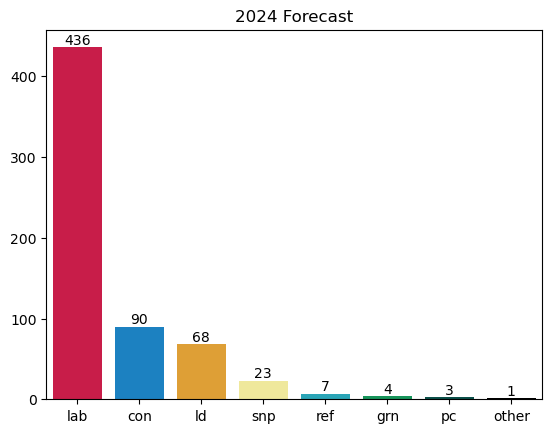

In [26]:
colours = sns.color_palette(list(party_colours.values()))
ordered_colours = {}
for party in df["BP_Winner"].value_counts().index:
    ordered_colours[party] = party_colours[party]

ax = sns.barplot(y=df["BP_Winner"].value_counts().values, x=list(df["BP_Winner"].value_counts().index), hue=df["BP_Winner"].value_counts().index, palette=ordered_colours, legend=False)
ax.set_title("2024 Forecast")
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

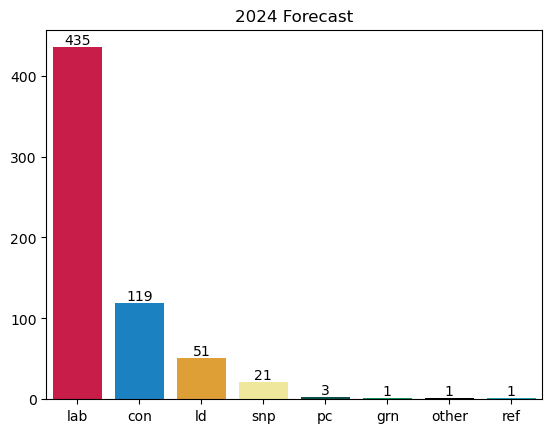

In [28]:
colours = sns.color_palette(list(party_colours.values()))
ordered_colours = {}
for party in df["E_Winner"].value_counts().index:
    ordered_colours[party] = party_colours[party]

ax = sns.barplot(y=df["E_Winner"].value_counts().values, x=list(df["E_Winner"].value_counts().index), hue=df["E_Winner"].value_counts().index, palette=ordered_colours, legend=False)
ax.set_title("2024 Forecast")
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

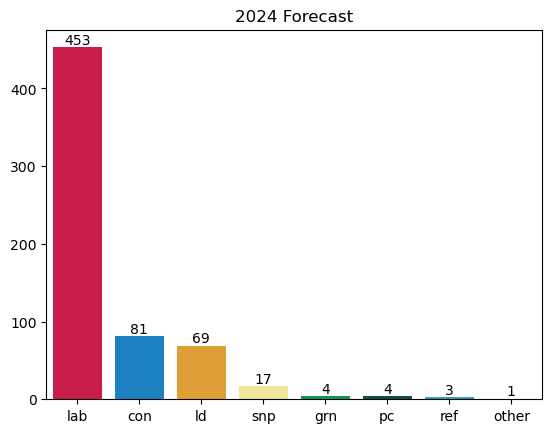

In [27]:
colours = sns.color_palette(list(party_colours.values()))
ordered_colours = {}
for party in df["EM_Winner"].value_counts().index:
    ordered_colours[party] = party_colours[party]

ax = sns.barplot(y=df["EM_Winner"].value_counts().values, x=list(df["EM_Winner"].value_counts().index), hue=df["EM_Winner"].value_counts().index, palette=ordered_colours, legend=False)
ax.set_title("2024 Forecast")
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

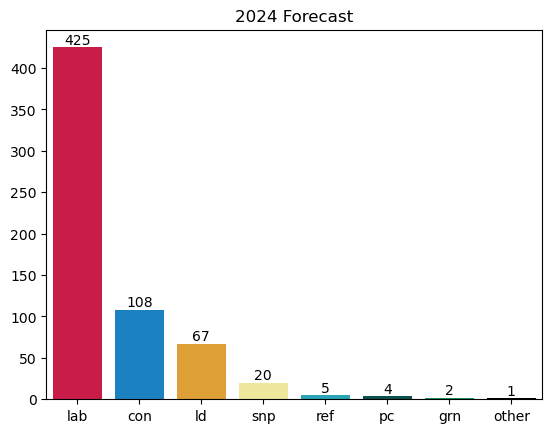

In [29]:
colours = sns.color_palette(list(party_colours.values()))
ordered_colours = {}
for party in df["Y_Winner"].value_counts().index:
    ordered_colours[party] = party_colours[party]

ax = sns.barplot(y=df["Y_Winner"].value_counts().values, x=list(df["Y_Winner"].value_counts().index), hue=df["Y_Winner"].value_counts().index, palette=ordered_colours, legend=False)
ax.set_title("2024 Forecast")

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

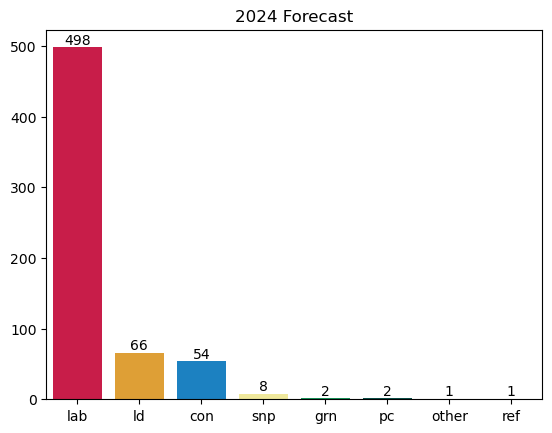

In [30]:
colours = sns.color_palette(list(party_colours.values()))
ordered_colours = {}
for party in df["S_Winner"].value_counts().index:
    ordered_colours[party] = party_colours[party]

ax = sns.barplot(y=df["S_Winner"].value_counts().values, x=list(df["S_Winner"].value_counts().index), hue=df["S_Winner"].value_counts().index, palette=ordered_colours, legend=False)
ax.set_title("2024 Forecast")
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

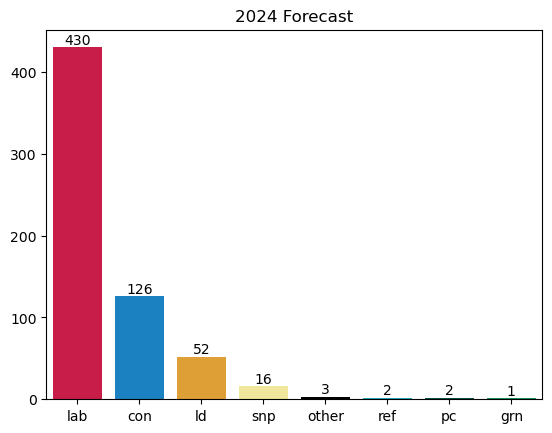

In [56]:
colours = sns.color_palette(list(party_colours.values()))
ordered_colours = {}
for party in df["MC_Winner"].value_counts().index:
    ordered_colours[party] = party_colours[party]

ax = sns.barplot(y=df["MC_Winner"].value_counts().values, x=list(df["MC_Winner"].value_counts().index), hue=df["MC_Winner"].value_counts().index, palette=ordered_colours, legend=False)
ax.set_title("2024 Forecast")
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [144]:
disputed

Constituency BP_Winner EM_Winner E_Winner Y_Winner  \
0                            Aldershot       lab       lab      lab      lab   
1                  Aldridge-Brownhills       con       con      con      con   
5                             Ashfield       lab       ref      lab      ref   
8                            Aylesbury        ld       lab      lab      lab   
14             Basildon and Billericay       con       lab      con      ref   
..                                 ...       ...       ...      ...      ...   
599  West Aberdeenshire and Kincardine       con       snp      snp      snp   
605        Brecon, Radnor and Cwm Tawe        ld        ld      con       ld   
607                        Caerfyrddin        pc        pc       pc       pc   
621        Montgomeryshire and Glyndwr       con       lab      lab      con   
631                           Ynys Mon       lab        pc      lab       pc   

    S_Winner MC_Winner  
0        lab       con  
1        lab       con  
5        lab       ref  
8        lab       con  
14       lab       con  
..       ...       ...  
599      con       snp  
605       ld        ld  
607      lab       lab  
621      lab       lab  
631      lab       lab  

[161 rows x 7 columns]

In [95]:
gdf = gpd.read_file("Full Constituency Data.gpkg")

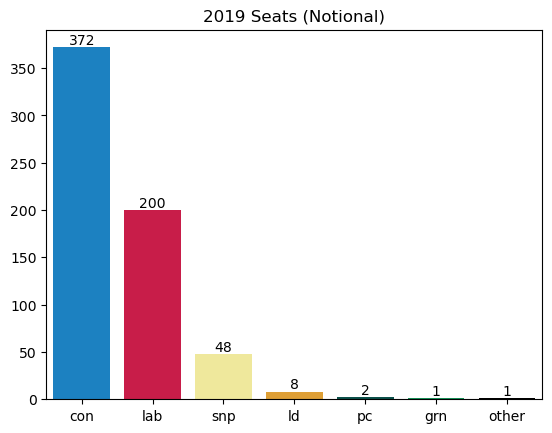

In [25]:
colours = sns.color_palette(list(party_colours.values()))
ordered_colours = {}
for party in gdf["2019_winner"].value_counts().index:
    ordered_colours[party] = party_colours[party]

ax = sns.barplot(y=gdf["2019_winner"].value_counts().values, x=list(gdf["2019_winner"].value_counts().index), hue=gdf["2019_winner"].value_counts().index, palette=ordered_colours, legend=False)
ax.set_title("2019 Seats (Notional)")
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [20]:
gdf.head()

PCON24CD              Constituency      LAT     LONG region  country  \
0  E14001063                 Aldershot  51.2903 -0.78648     SE  England   
1  E14001064       Aldridge-Brownhills  52.6071 -1.93173     WM  England   
2  E14001065  Altrincham and Sale West  53.3977 -2.39049     NW  England   
3  E14001066              Amber Valley  53.0428 -1.39771     EM  England   
4  E14001067   Arundel and South Downs  50.9580 -0.61585     SE  England   

  2019_winner 2019_majority  turnout  con_2019  ...  Muslim  Sikh  \
0         con         17985     67.5     29453  ...     2.2   0.2   
1         con         22758     64.7     32941  ...     2.2   5.2   
2         con          6139     74.1     26311  ...     6.4   0.4   
3         con         16891     64.6     29118  ...     0.2   0.2   
4         con         24105     75.5     35117  ...     0.3   0.0   

   Other religion  Not answered  Owned outright  \
0             1.1           5.4            27.7   
1             0.5           5.0            42.0   
2             0.4           5.0            37.7   
3             0.5           5.8            39.2   
4             0.5           6.1            44.3   

   Owned with a mortgage or loan  Private rented  Social rented  Other tenure  \
0                           35.5            20.0           15.1           1.8   
1                           33.2            10.7           13.4           0.7   
2                           36.4            13.8           11.4           0.6   
3                           30.7            14.8           14.7           0.6   
4                           28.6            14.3           11.7           1.0   

                                            geometry  
0  POLYGON Z ((483364.601 160961.805 0.000, 48337...  
1  POLYGON Z ((406519.098 305054.298 0.000, 40648...  
2  POLYGON Z ((377443.302 393344.296 0.000, 37745...  
3  POLYGON Z ((436223.299 356984.804 0.000, 43624...  
4  POLYGON Z ((505688.454 133874.110 0.000, 50569...  

[5 rows x 70 columns]

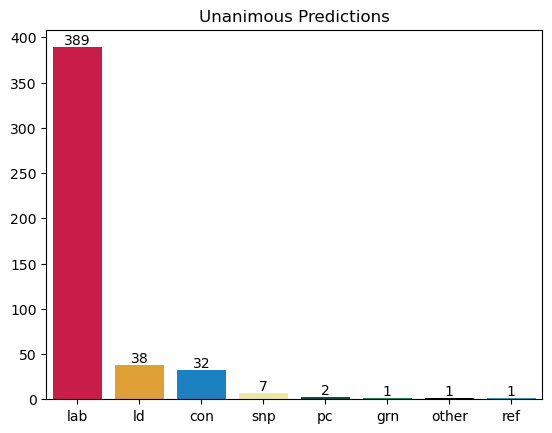

In [189]:
colours = sns.color_palette(list(party_colours.values()))
ordered_colours = {}
for party in unanimous["BP_Winner"].value_counts().index:
    ordered_colours[party] = party_colours[party]

ax = sns.barplot(y=unanimous["BP_Winner"].value_counts().values, x=list(unanimous["BP_Winner"].value_counts().index), hue=unanimous["BP_Winner"].value_counts().index, palette=ordered_colours, legend=False)
ax.set_title("Unanimous Predictions")

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

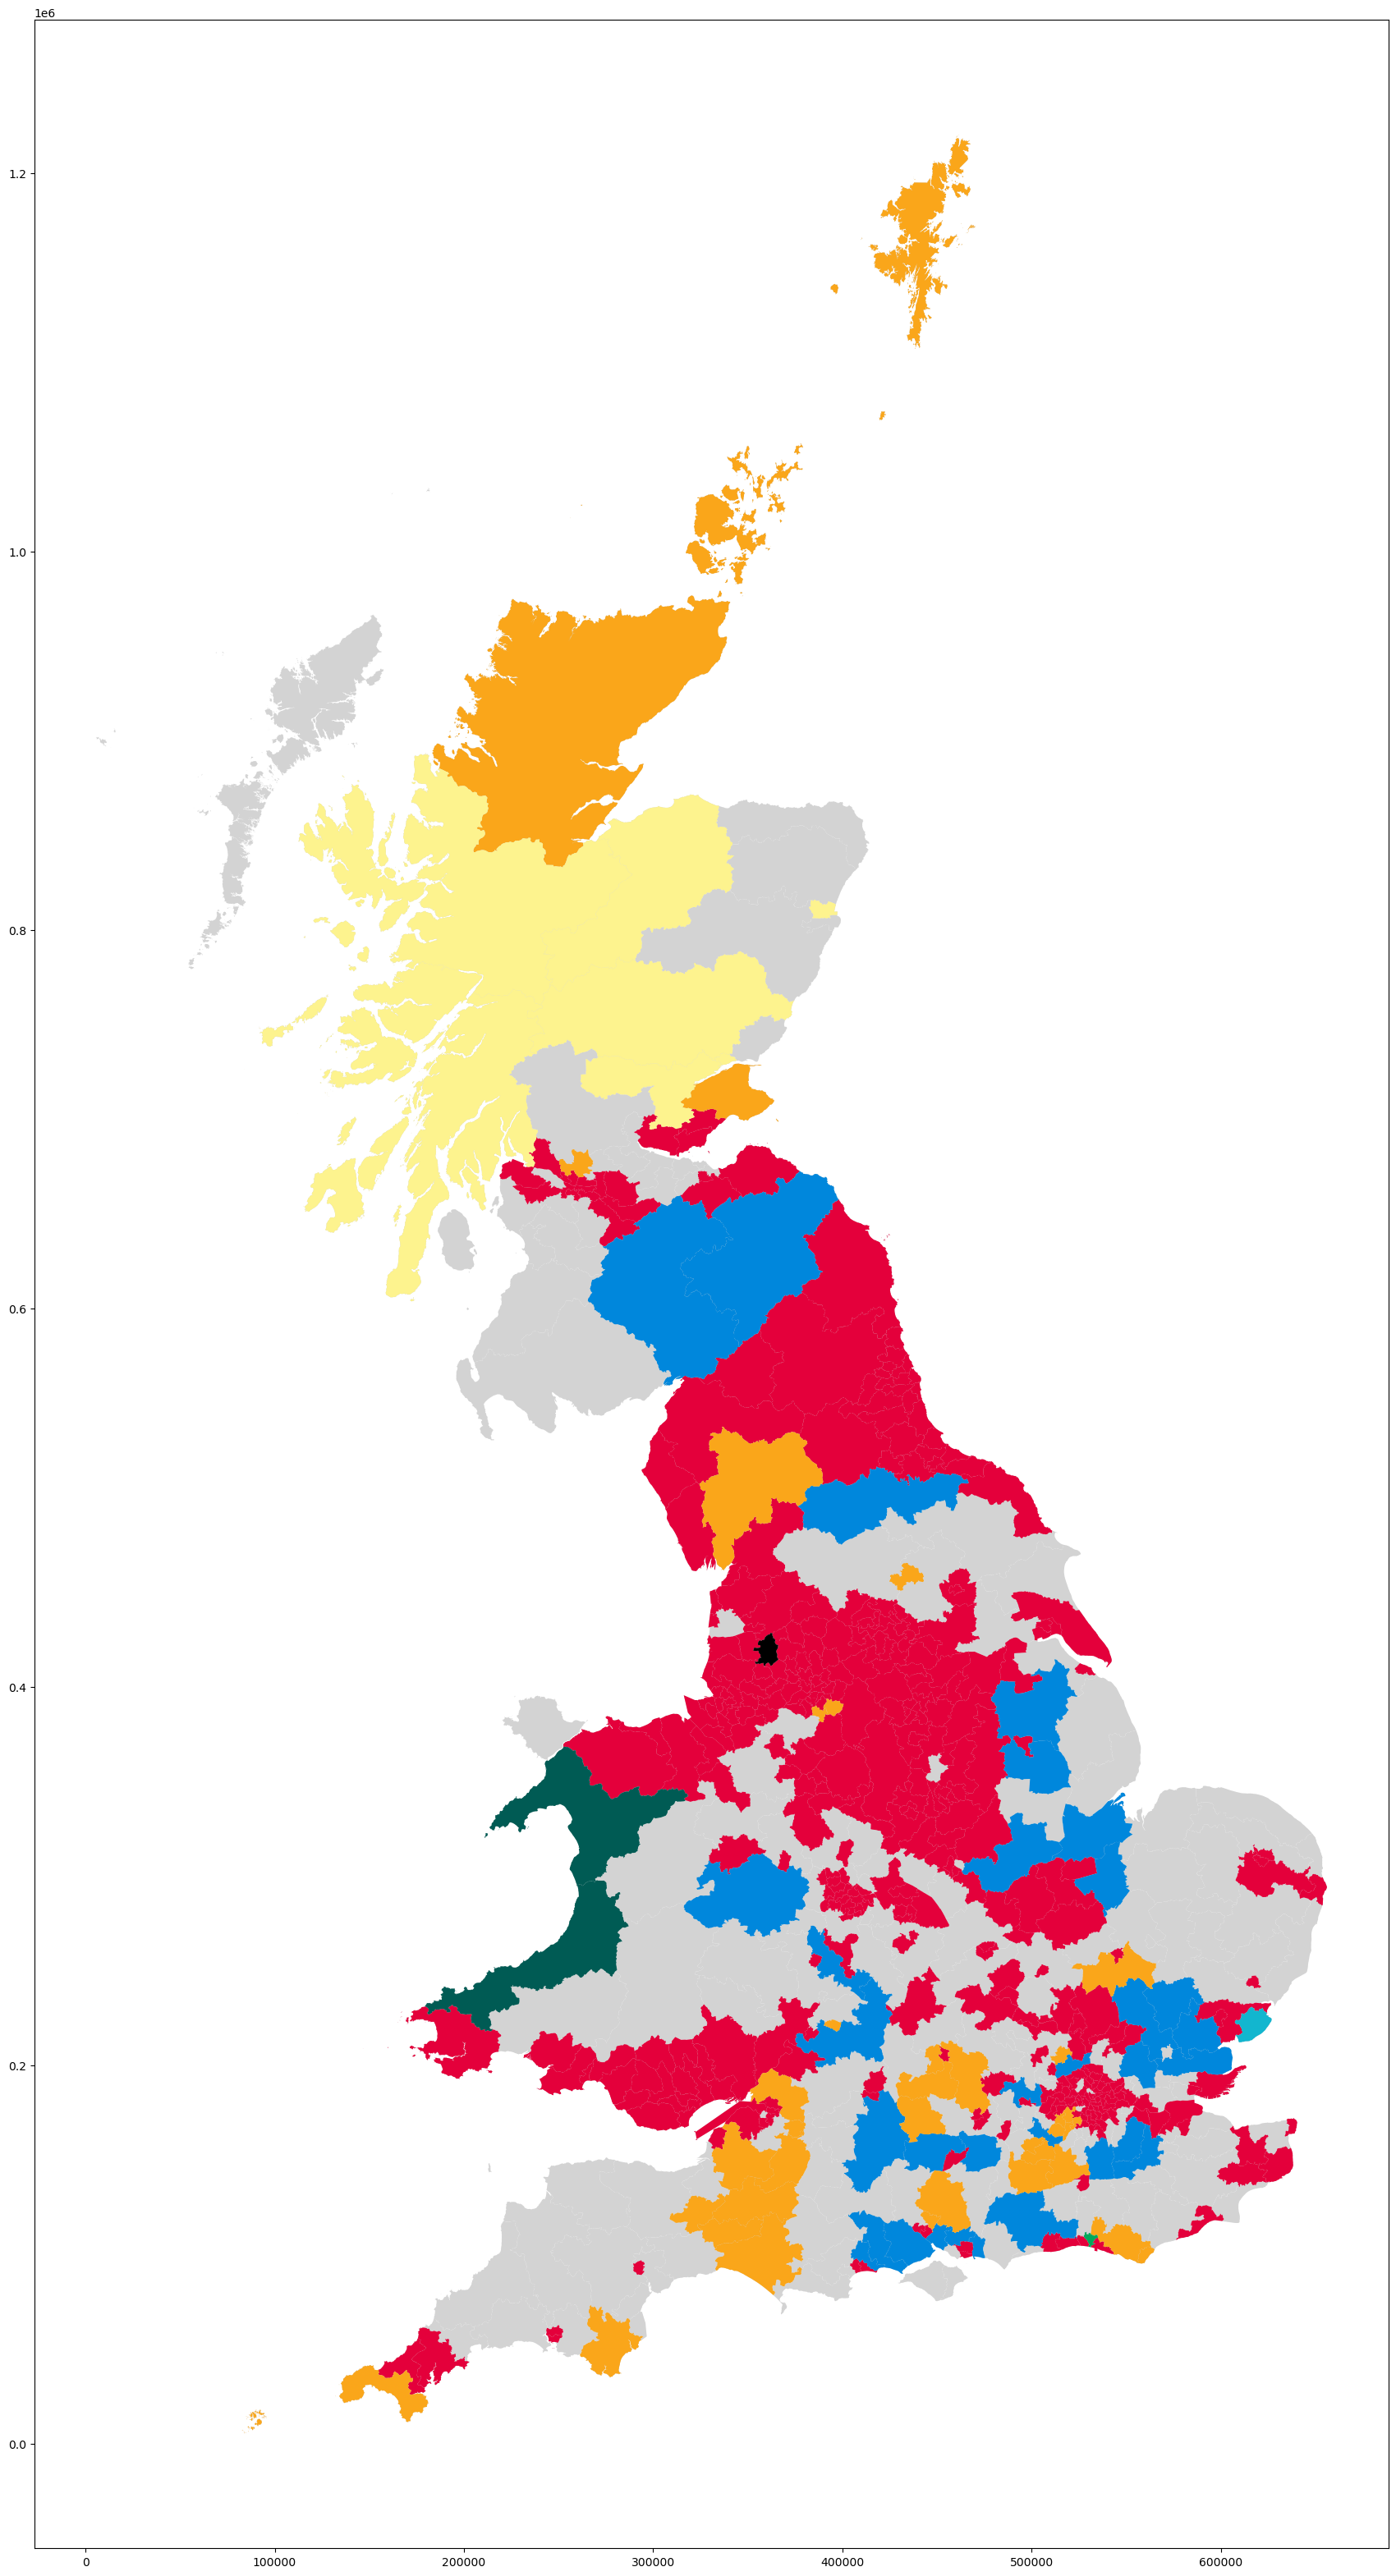

In [68]:
ax = gdf.plot(figsize=(40,40), color="lightgray", edgecolor="none")



for party in list(unanimous["BP_Winner"].unique()):
    unanimous[unanimous["BP_Winner"] == party].plot(ax=ax, color= party_colours[party], edgecolor="none")


In [58]:

df = pd.merge(gdf, df, right_on="Constituency", left_on="constituency")

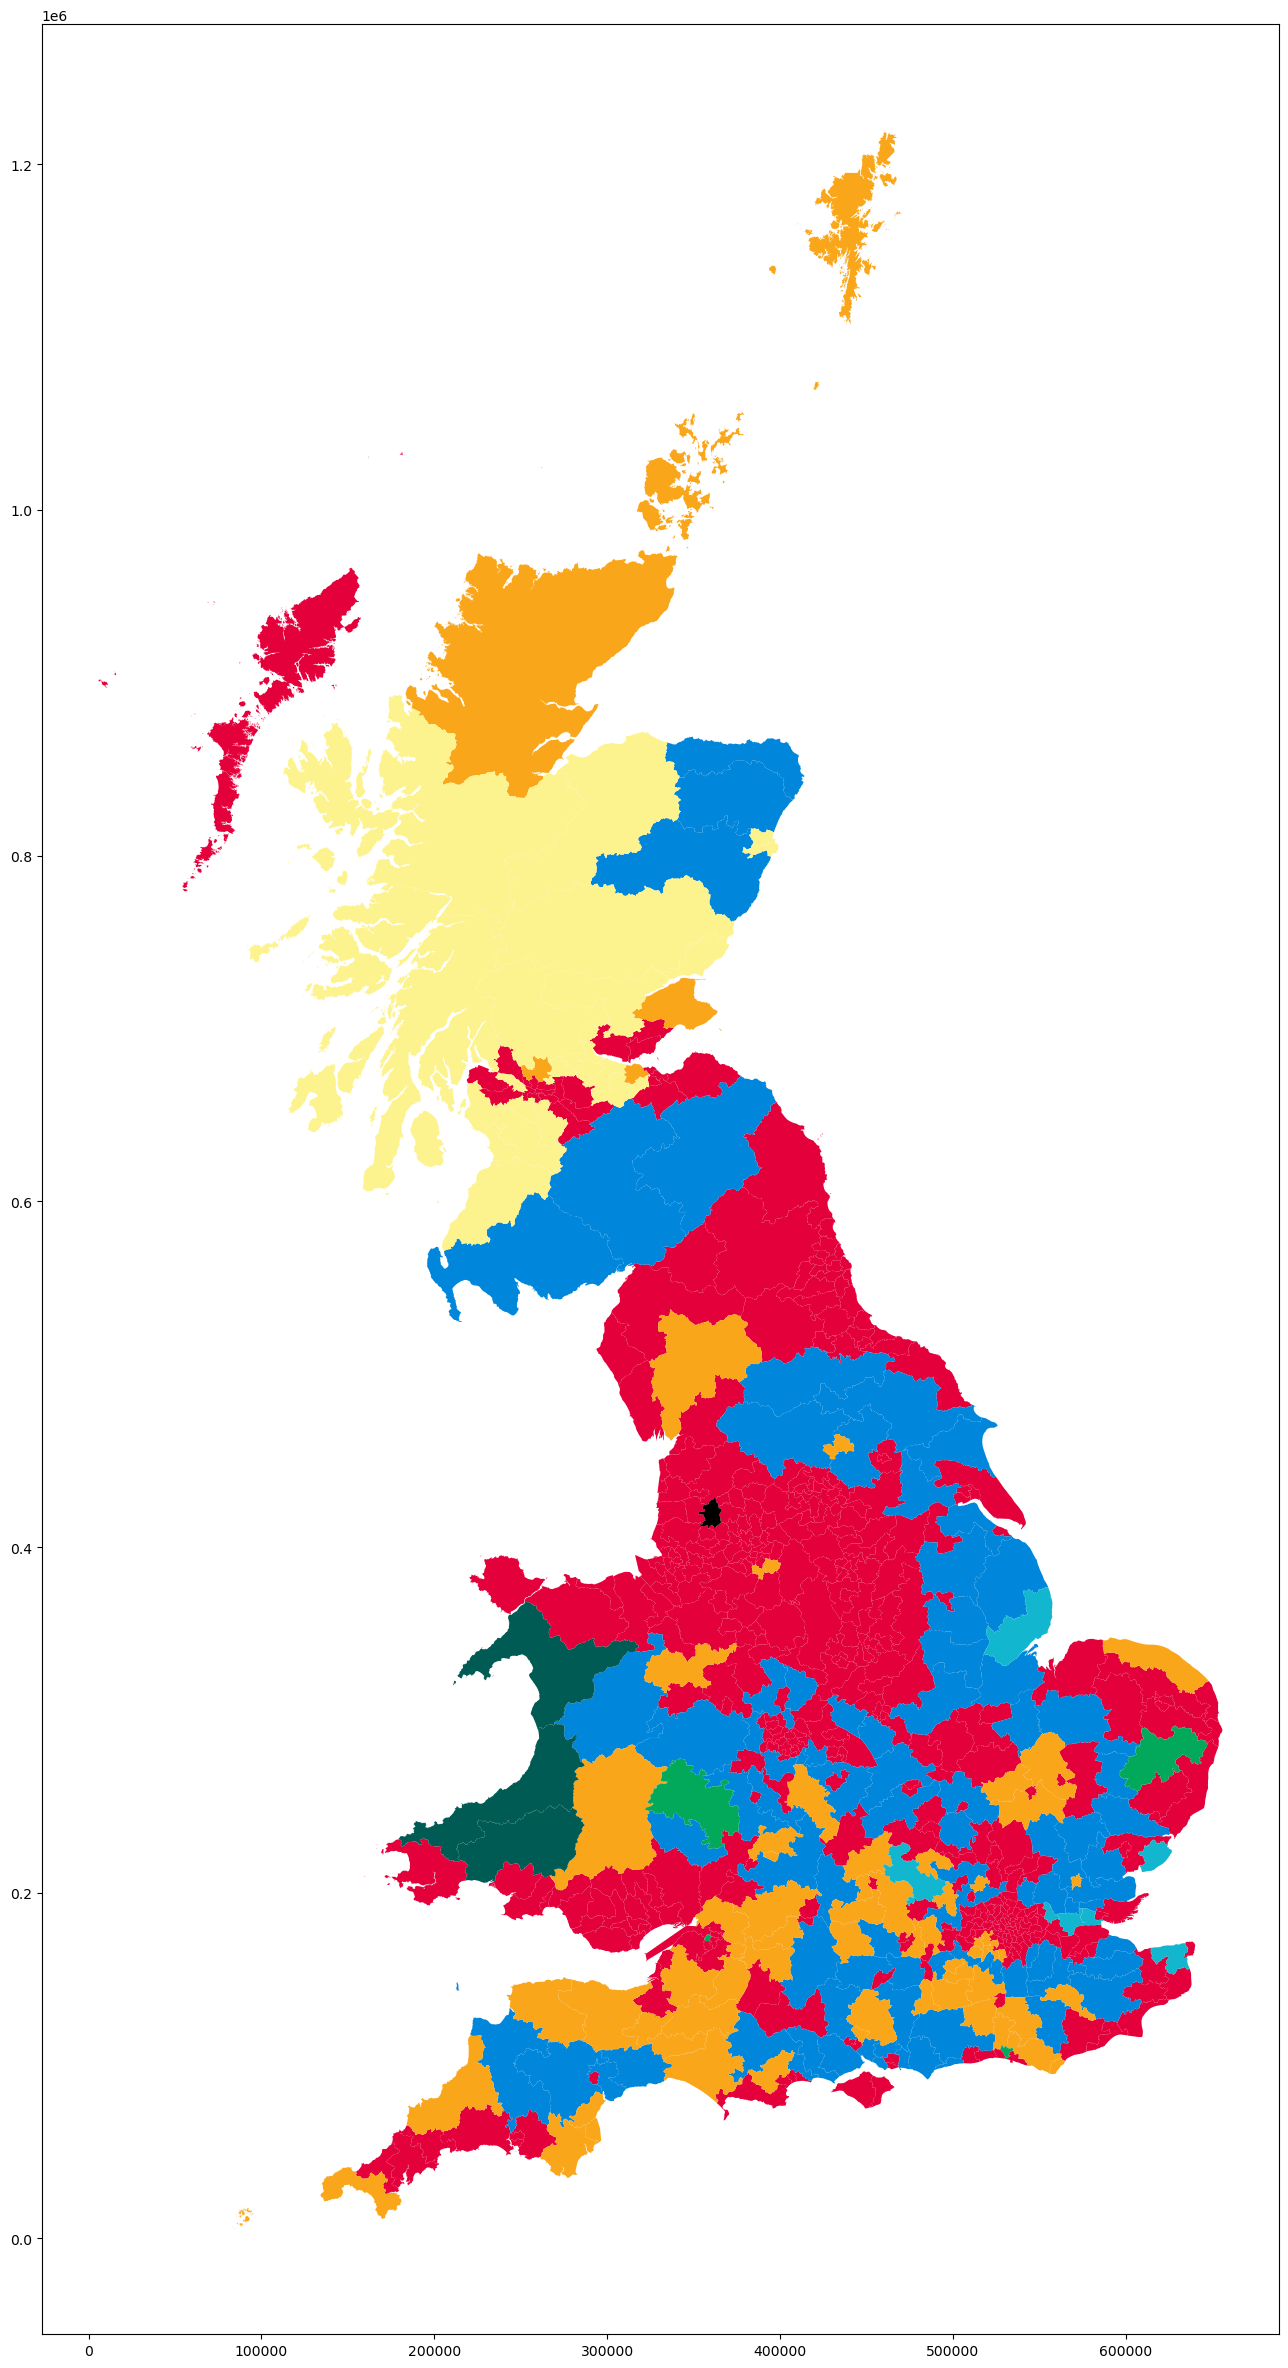

In [69]:
ax = df.plot(figsize = (30,30), color="none", edgecolor="none")
for party in df["BP_Winner"].unique():
    df[df["BP_Winner"] == party].plot(ax=ax, color= party_colours[party])

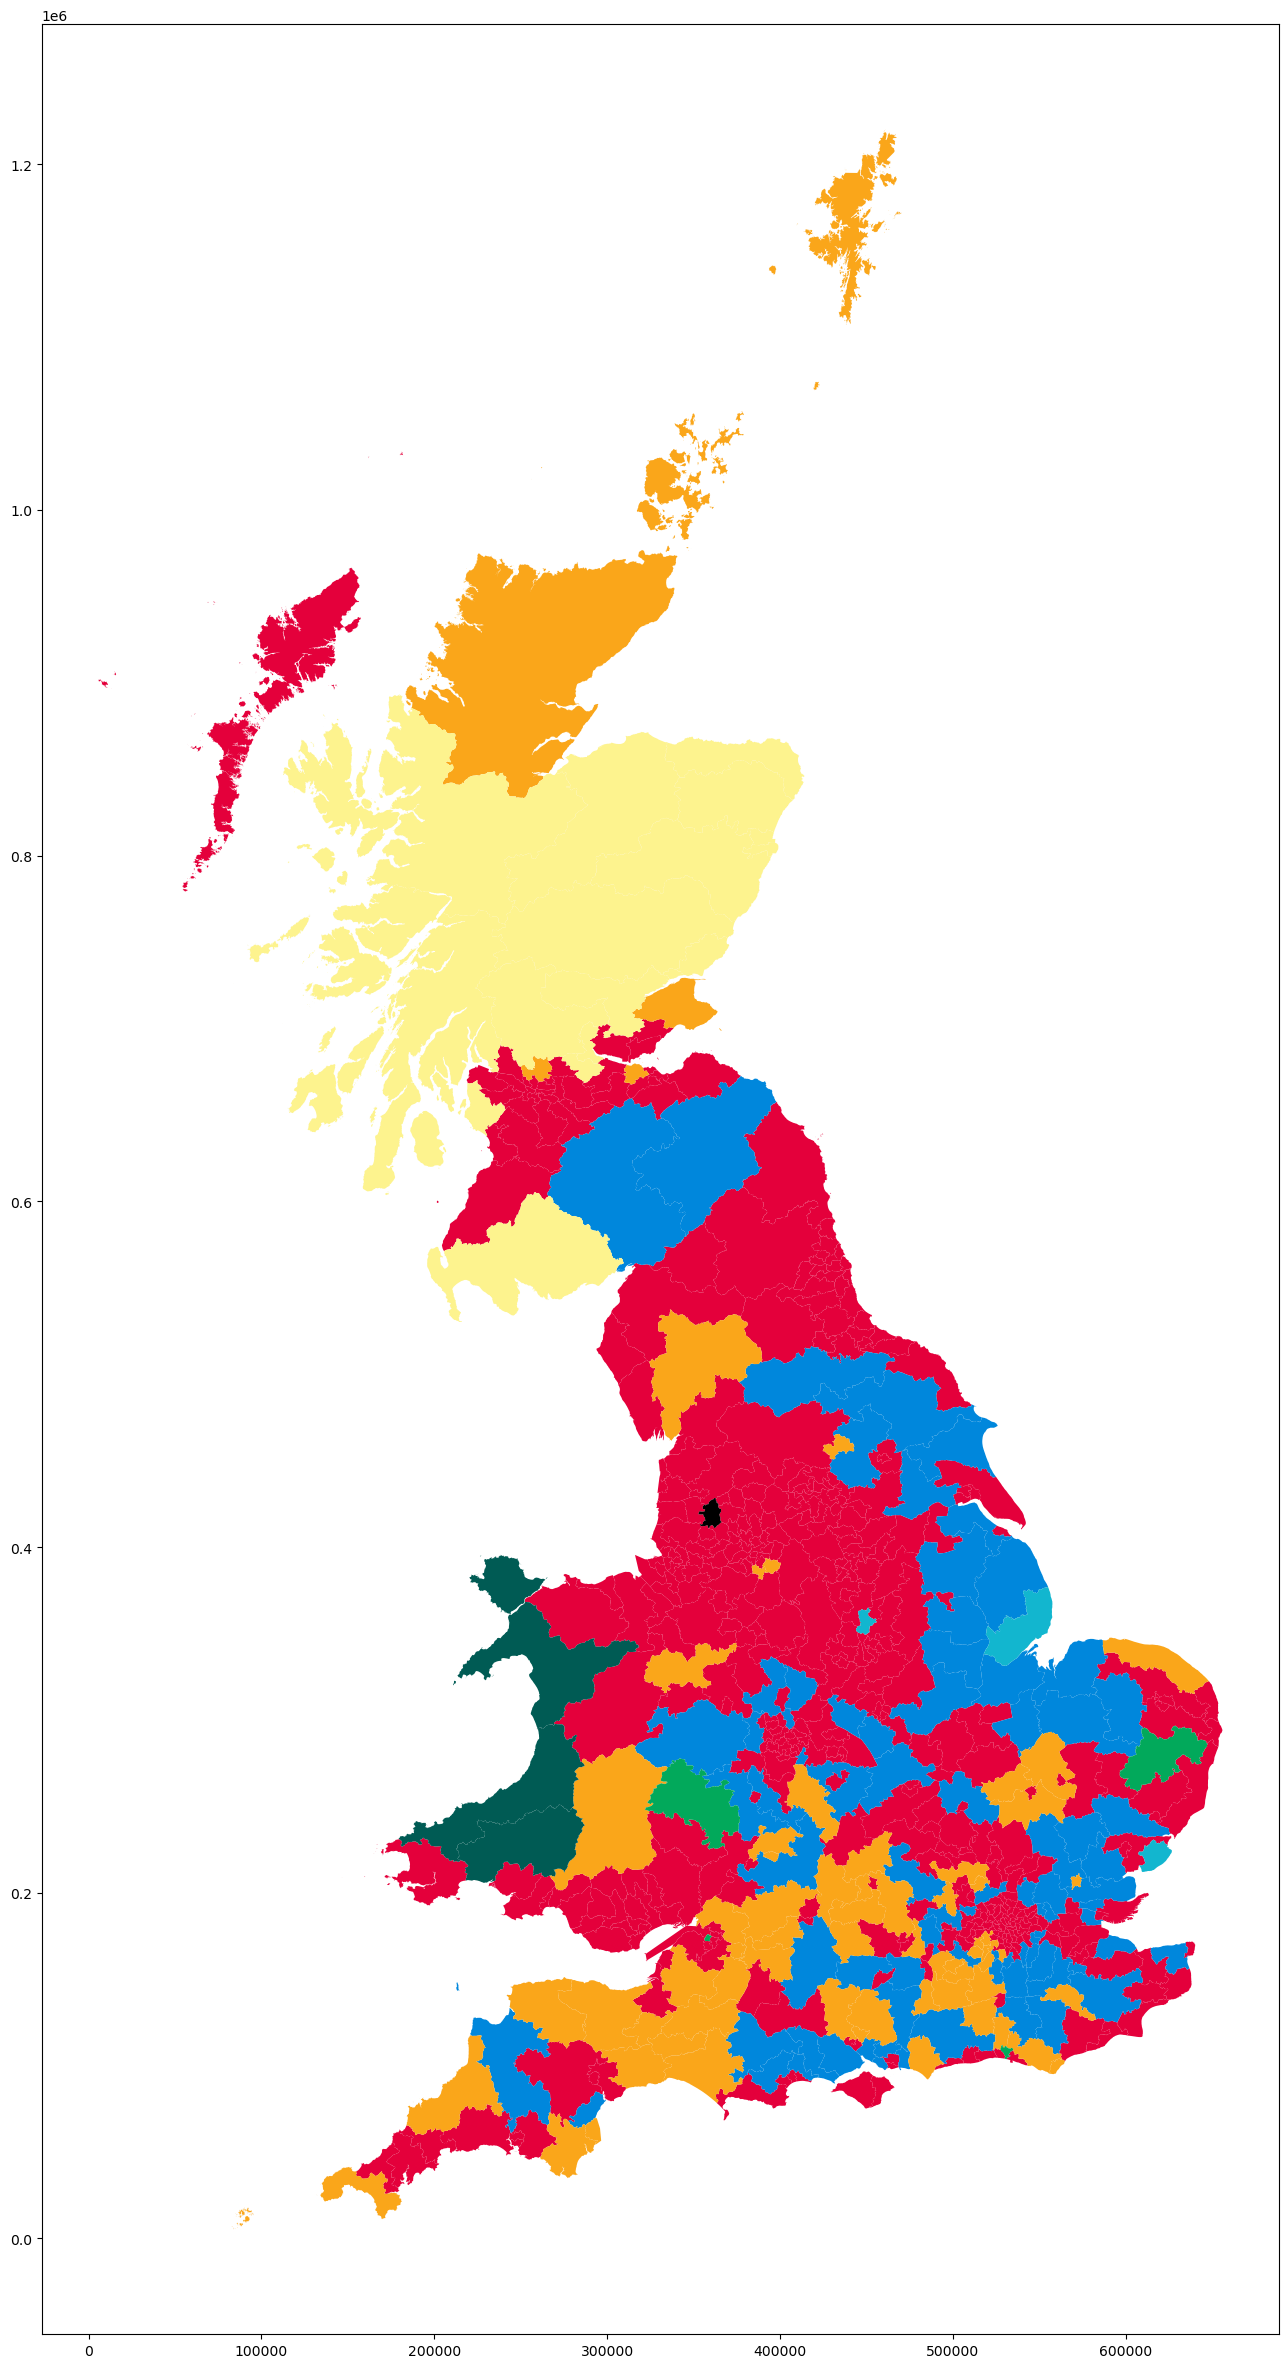

In [70]:
ax = df.plot(figsize = (30,30), color="none", edgecolor="none")
for party in df["EM_Winner"].unique():
    df[df["EM_Winner"] == party].plot(ax=ax, color= party_colours[party])

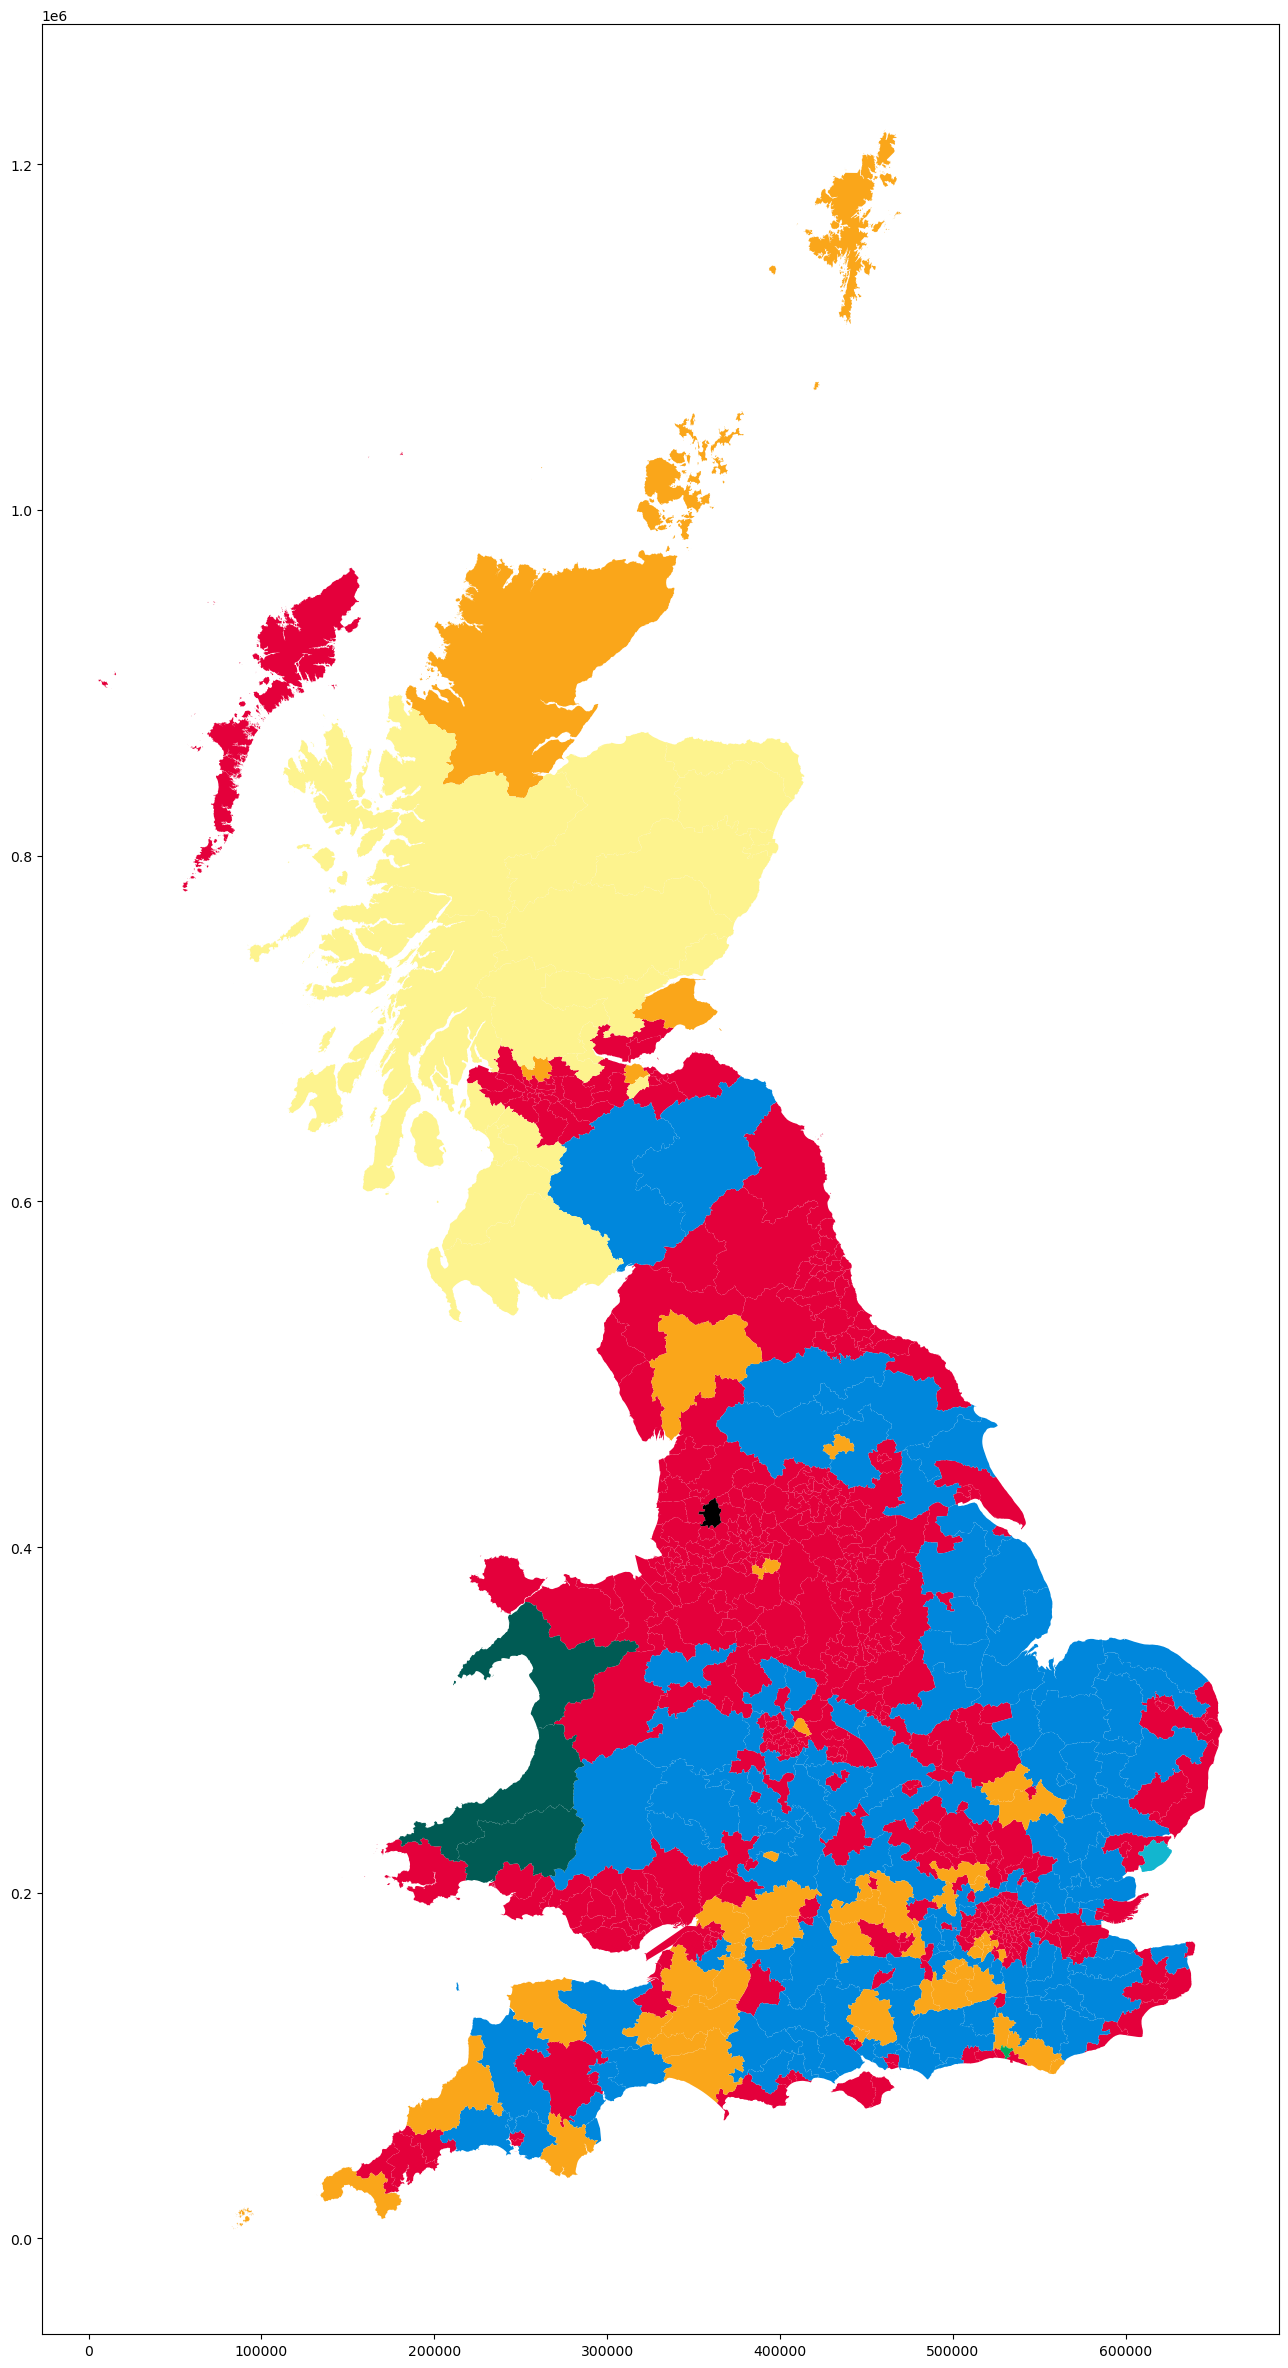

In [71]:
ax = df.plot(figsize = (30,30), color="none", edgecolor="none")
for party in df["E_Winner"].unique():
    df[df["E_Winner"] == party].plot(ax=ax, color= party_colours[party])

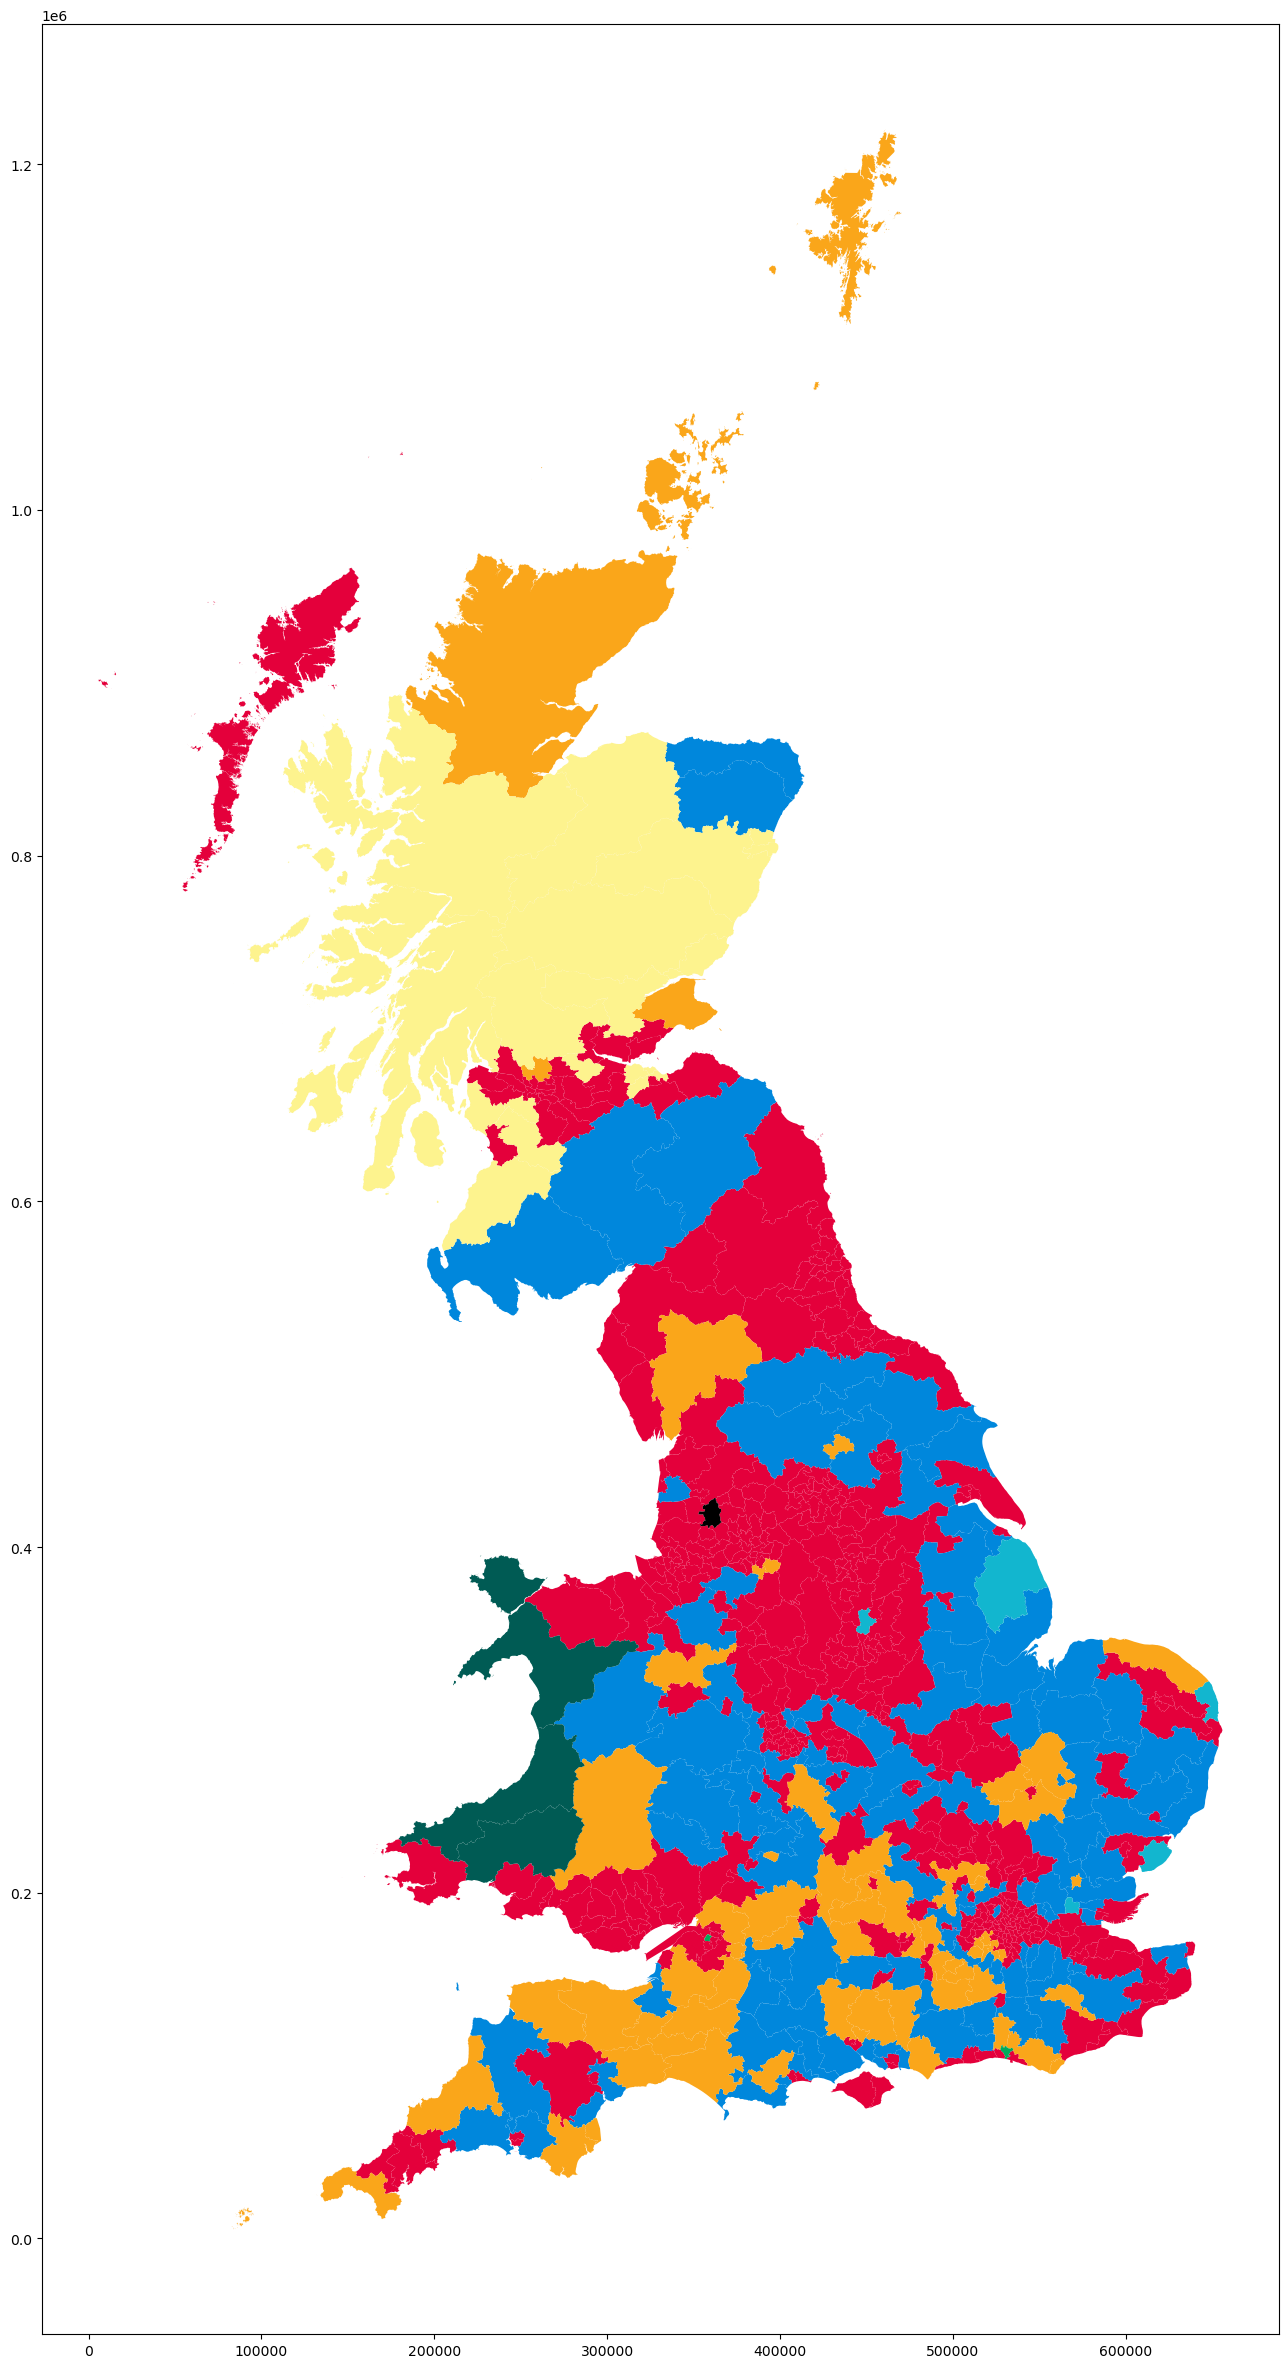

In [72]:
ax = df.plot(figsize = (30,30), color="none", edgecolor="none")
for party in df["Y_Winner"].unique():
    df[df["Y_Winner"] == party].plot(ax=ax, color= party_colours[party])

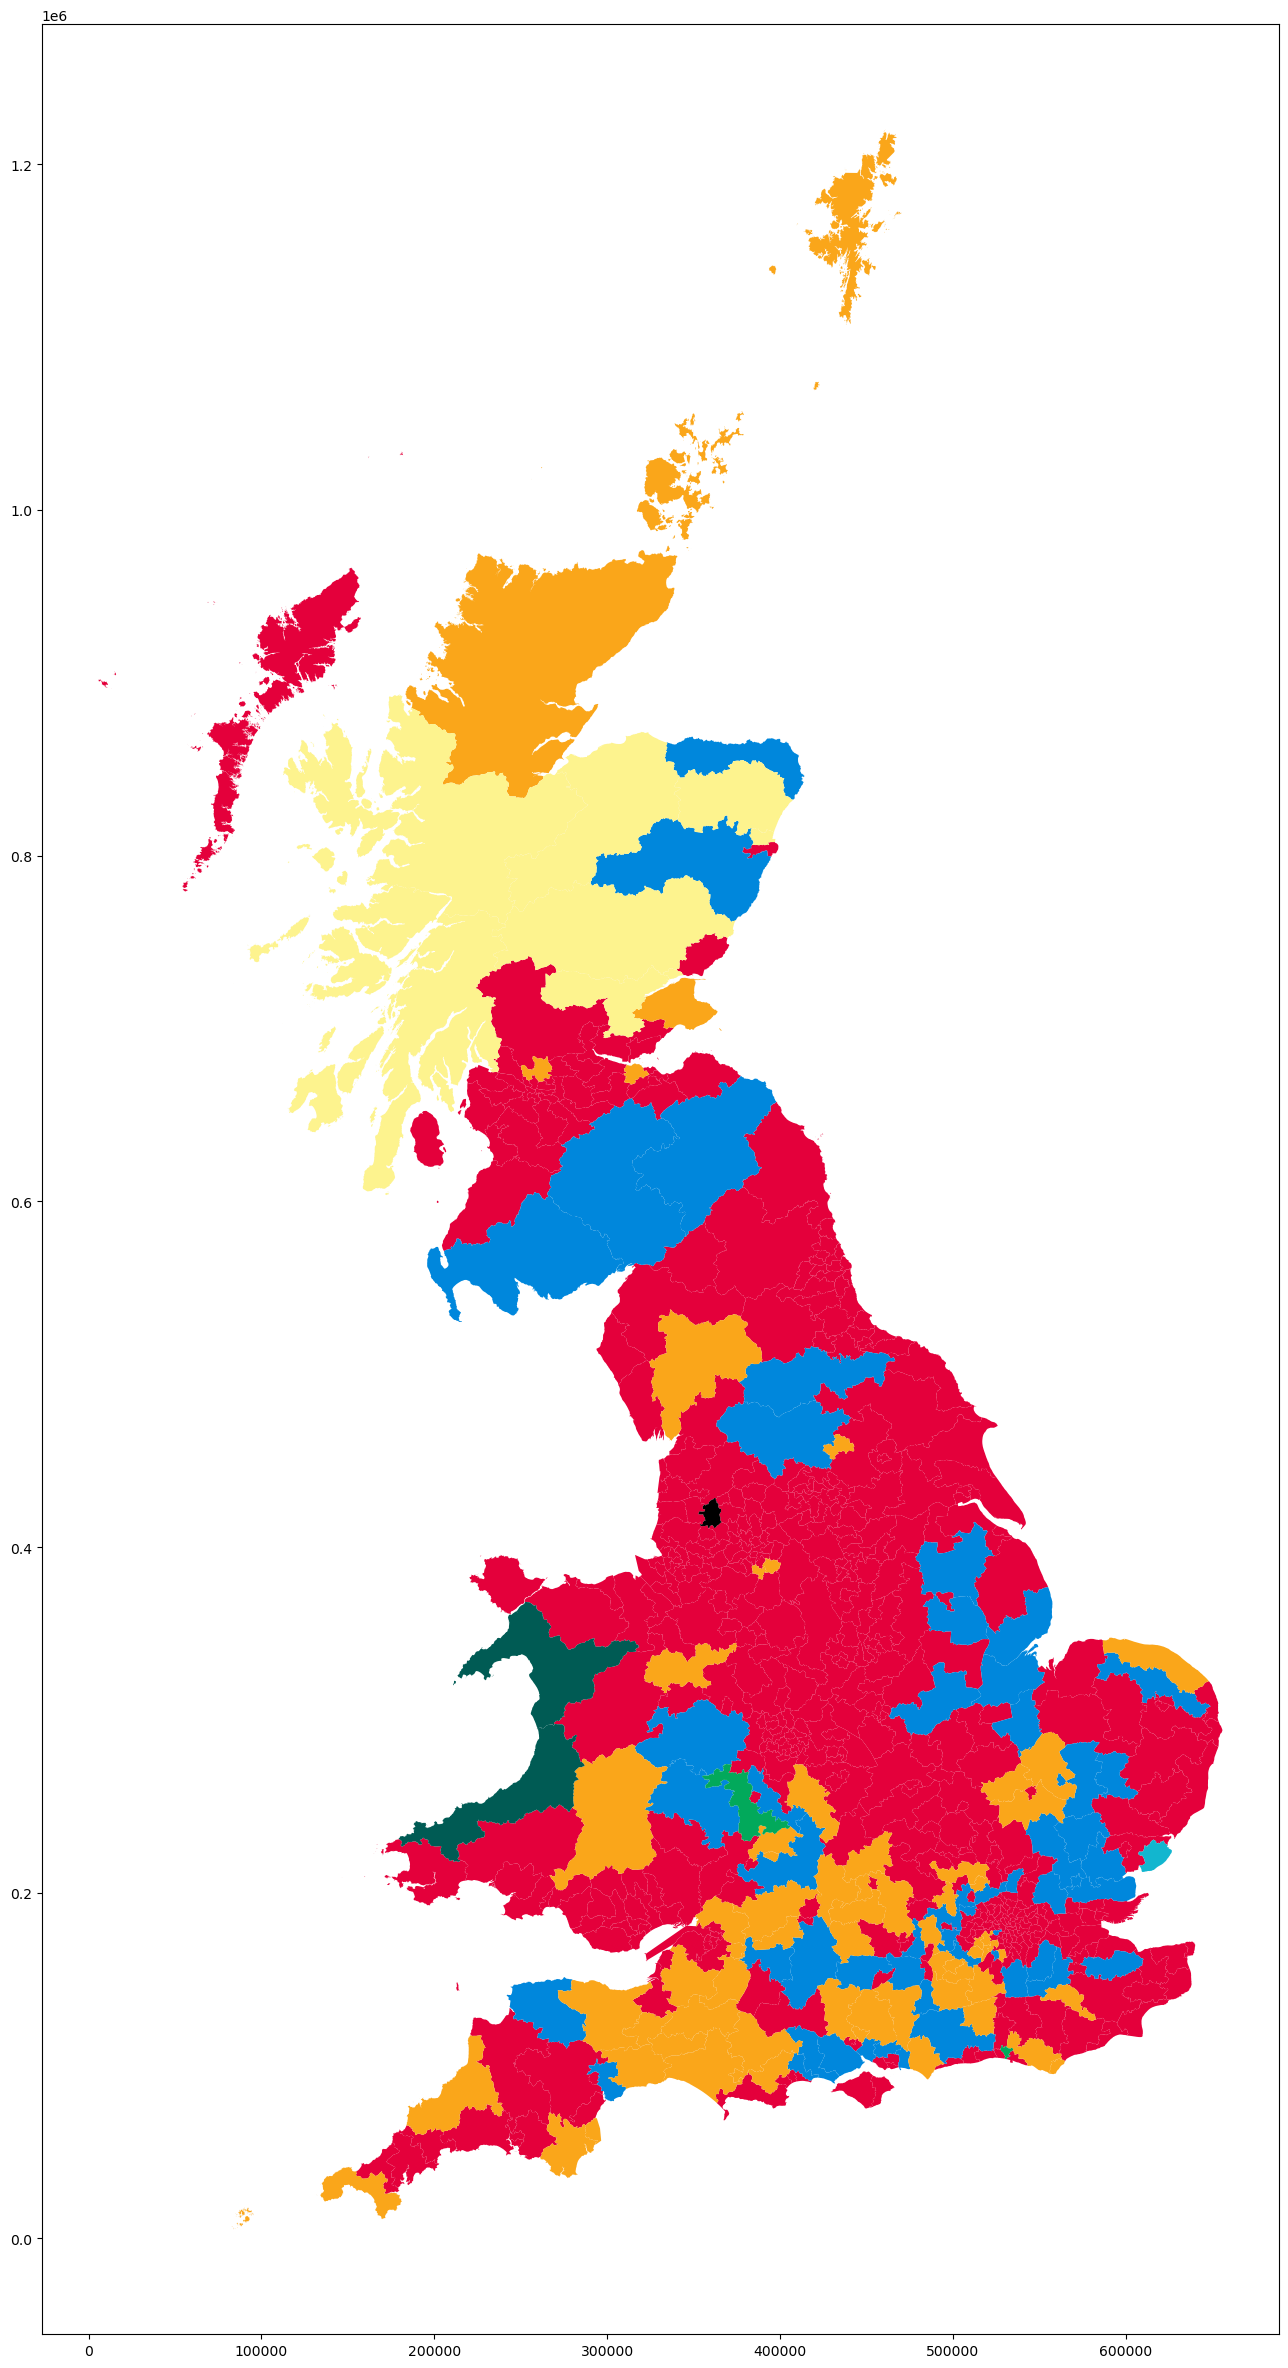

In [73]:
ax = df.plot(figsize = (30,30), color="none", edgecolor="none")
for party in df["S_Winner"].unique():
    df[df["S_Winner"] == party].plot(ax=ax, color= party_colours[party])

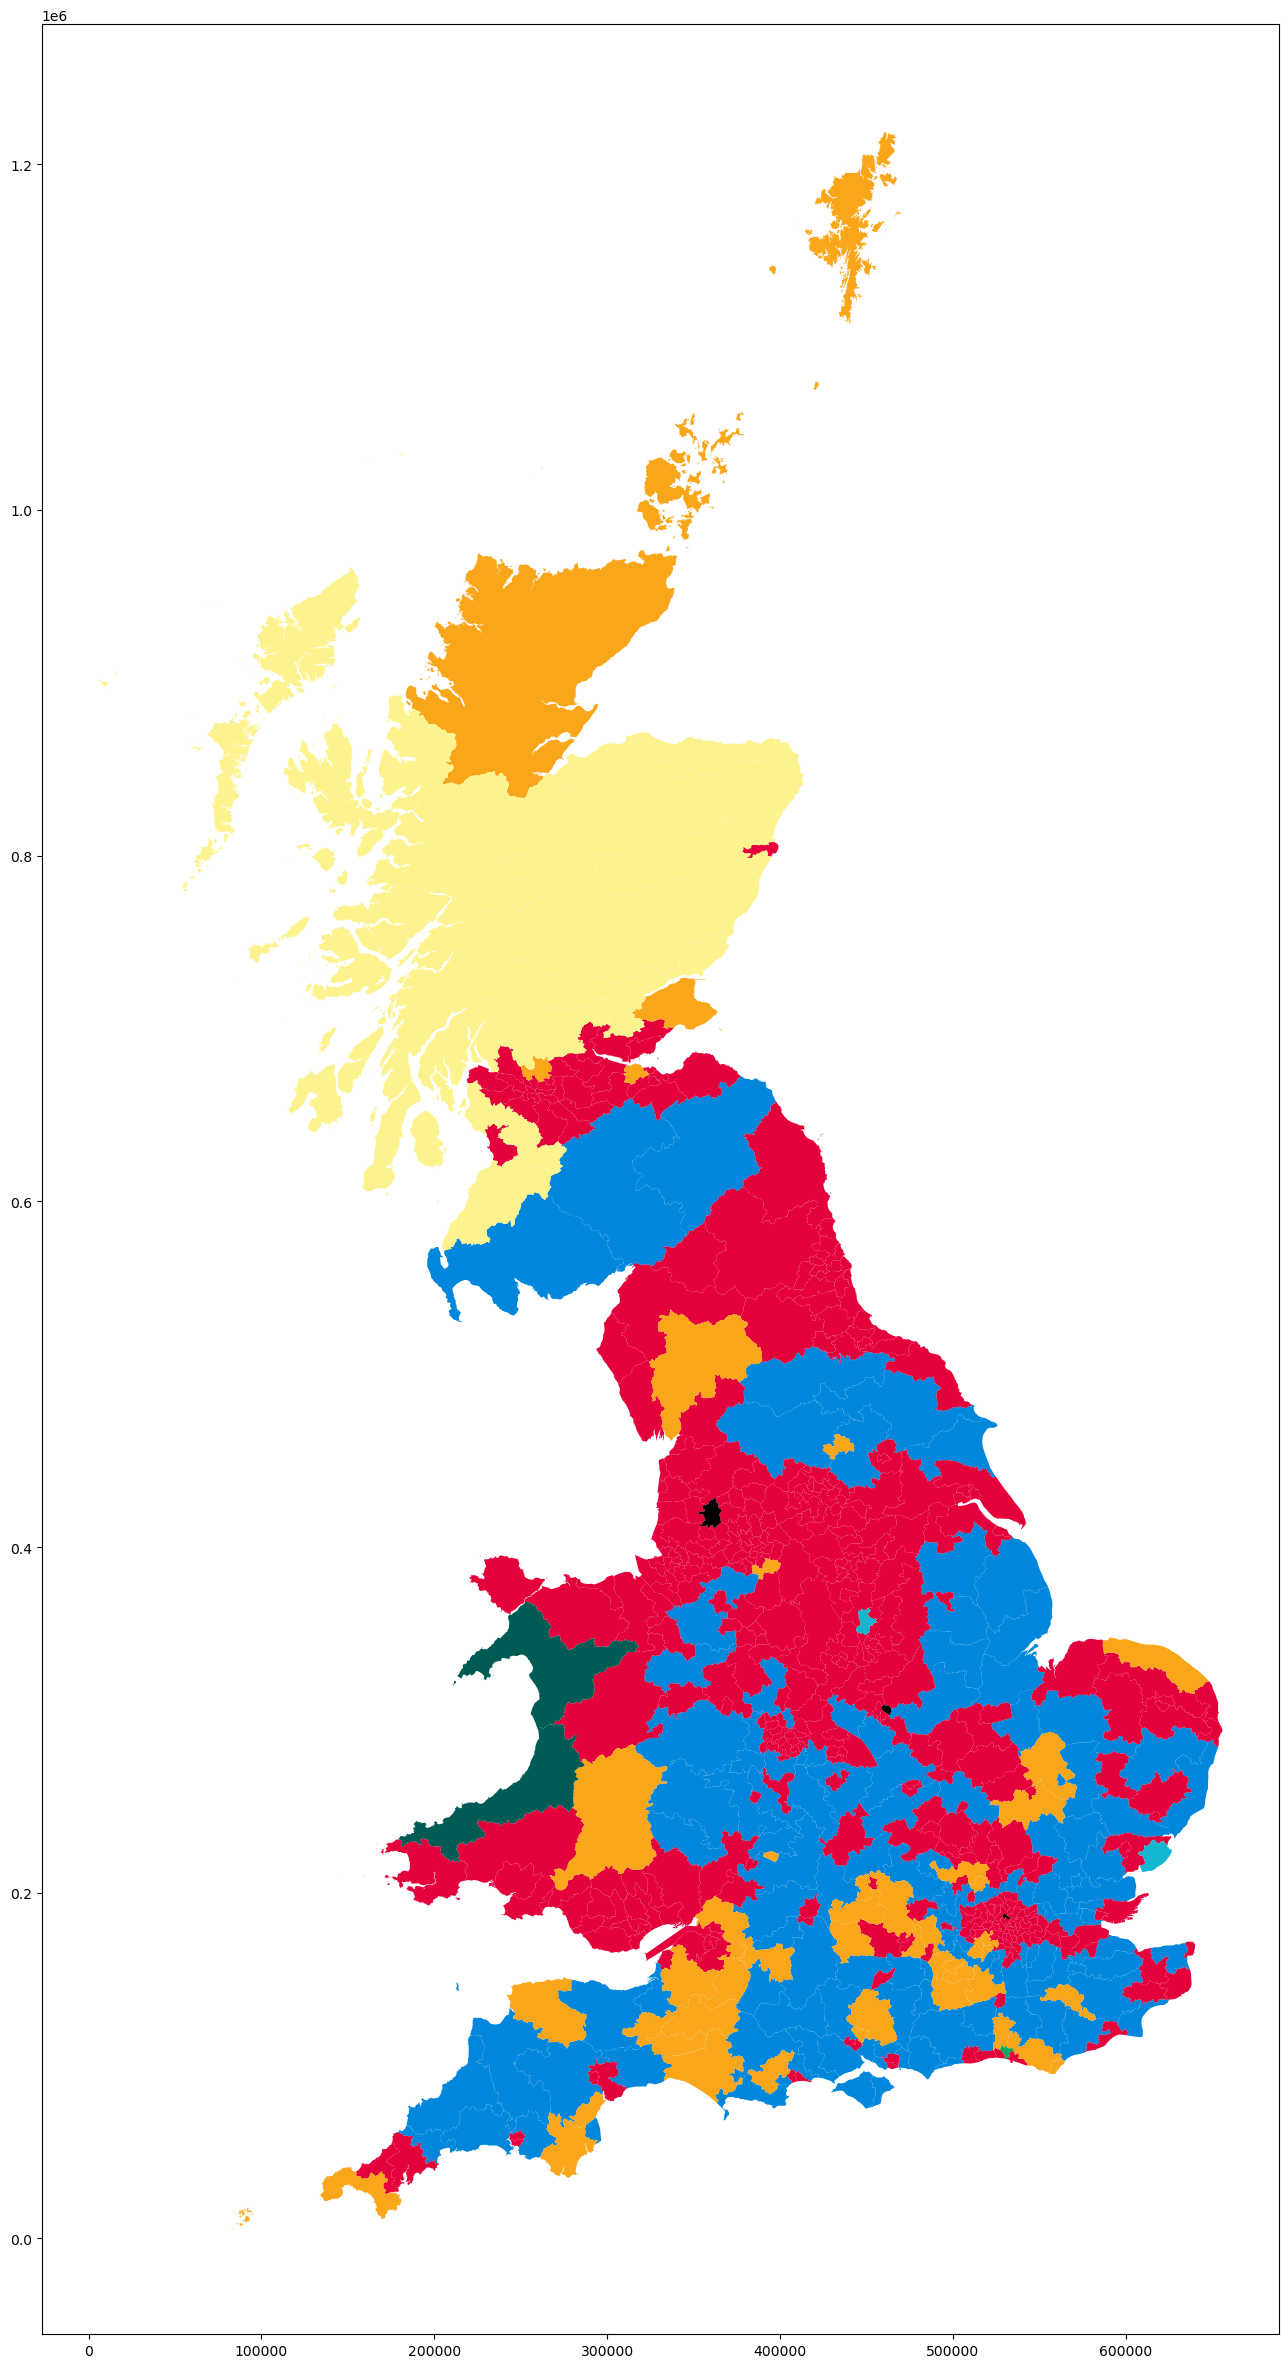

In [161]:
ax = df.plot(figsize = (30,30), color="none", edgecolor="none")
for party in df["MC_Winner"].unique():
    df[df["MC_Winner"] == party].plot(ax=ax, color= party_colours[party])

In [61]:
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse

In [104]:
parties = ["Con", "Lab", "LDem", "Grn", "Ref", "SNP", "PC", "Other"]
predictors = ["BP", "EM", "E", "Y", "S", "MC"]


In [105]:

party_differences = {}

for party in parties:
    party_differences[party] = pd.DataFrame(columns=predictors, index=predictors)
    print(party)
    j = 1
    for pred1 in predictors:
        #party_differences[party].loc[pred1, pred1] = 0
        i = j
        for pred2 in predictors[i:]:
            print(f"{pred1} vs {pred2}: {rmse(df[f'{pred1}_{party}'], df[f'{pred2}_{party}'])}")
            party_differences[party].loc[pred1, pred2] = (df[f'{pred1}_{party}'] - df[f'{pred2}_{party}']).mean()
            #party_differences[party].loc[pred2, pred1] = (df[f'{pred2}_{party}'] - df[f'{pred1}_{party}']).mean()
            i +=1
        j += 1
    print("---------------")

Con
BP vs EM: 6.124308279204614
BP vs E: 4.877178189138427
BP vs Y: 6.380287581312707
BP vs S: 5.052637549095684
BP vs MC: 5.321466558112896
EM vs E: 3.2643500138095223
EM vs Y: 4.015393638978546
EM vs S: 4.598585776001194
EM vs MC: 4.424292834861589
E vs Y: 3.479142190216841
E vs S: 3.154707252361345
E vs MC: 2.8973198003182965
Y vs S: 4.631663246651223
Y vs MC: 4.492979756087
S vs MC: 3.6784641814454595
---------------
Lab
BP vs EM: 3.9358844887598976
BP vs E: 4.592683022131198
BP vs Y: 6.189263110266138
BP vs S: 8.223201690601039
BP vs MC: 6.221516106081205
EM vs E: 4.404410189108646
EM vs Y: 5.4108511462229565
EM vs S: 6.786268374398929
EM vs MC: 5.743011713752967
E vs Y: 4.850779658069333
E vs S: 6.167761105698082
E vs MC: 4.7772204725172545
Y vs S: 7.655192568413526
Y vs MC: 6.272756041360957
S vs MC: 6.649603716659181
---------------
LDem
BP vs EM: 2.846672496757832
BP vs E: 3.3064450870873467
BP vs Y: 4.197646643271936
BP vs S: 4.353041440014213
BP vs MC: 4.390575349397181
EM v

In [106]:
from sklearn.metrics import accuracy_score

j = 1
for pred1 in predictors:
    i = j
    for pred2 in predictors[i:]:
        print(f"{pred1} vs {pred2}")
        print(accuracy_score(df[f"{pred1}_Winner"], df[f"{pred2}_Winner"]))
        i += 1
        print("------------------")
    j += 1


BP vs EM
0.9098101265822784
------------------
BP vs E
0.9082278481012658
------------------
BP vs Y
0.8876582278481012
------------------
BP vs S
0.8544303797468354
------------------
BP vs MC
0.8734177215189873
------------------
EM vs E
0.9145569620253164
------------------
EM vs Y
0.9066455696202531
------------------
EM vs S
0.8734177215189873
------------------
EM vs MC
0.8718354430379747
------------------
E vs Y
0.9018987341772152
------------------
E vs S
0.8512658227848101
------------------
E vs MC
0.9066455696202531
------------------
Y vs S
0.8512658227848101
------------------
Y vs MC
0.8939873417721519
------------------
S vs MC
0.8354430379746836
------------------


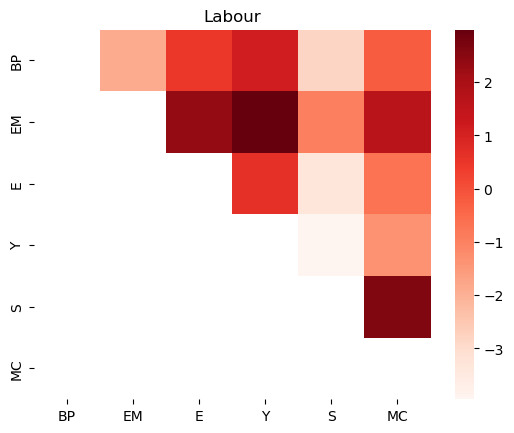

In [107]:
sns.heatmap(party_differences["Lab"].astype(float), cmap="Reds")
plt.title("Labour")
plt.show()

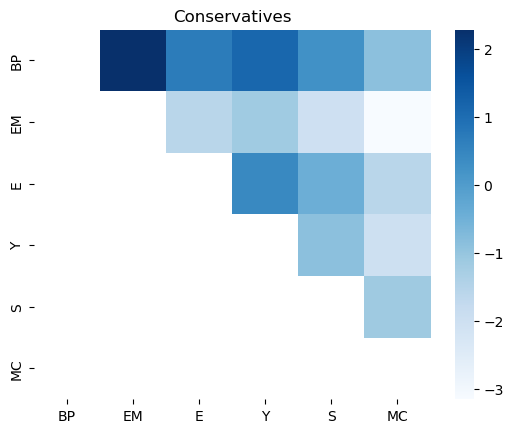

In [108]:
sns.heatmap(party_differences["Con"].astype(float), cmap="Blues")
plt.title("Conservatives")
plt.show()

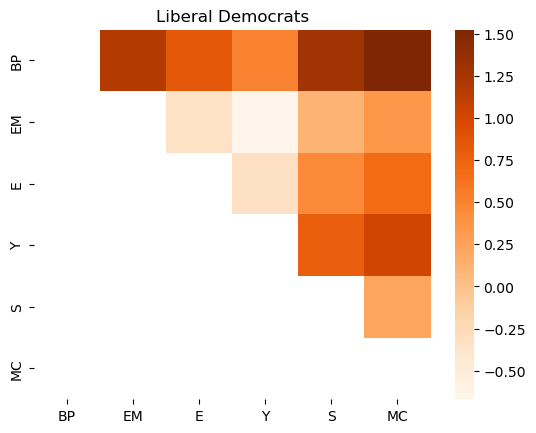

In [109]:
sns.heatmap(party_differences["LDem"].astype(float), cmap="Oranges")
plt.title("Liberal Democrats")
plt.show()

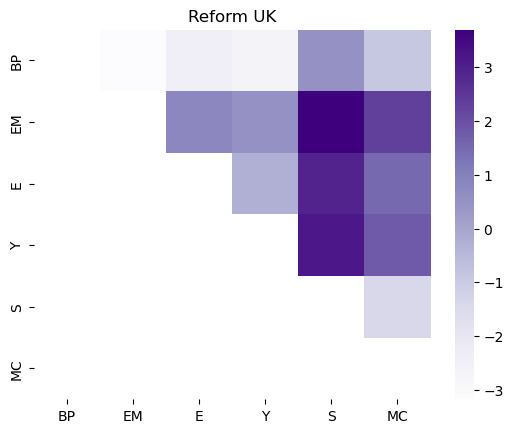

In [63]:
sns.heatmap(party_differences["Ref"].astype(float), cmap="Purples")
plt.title("Reform UK")
plt.show()

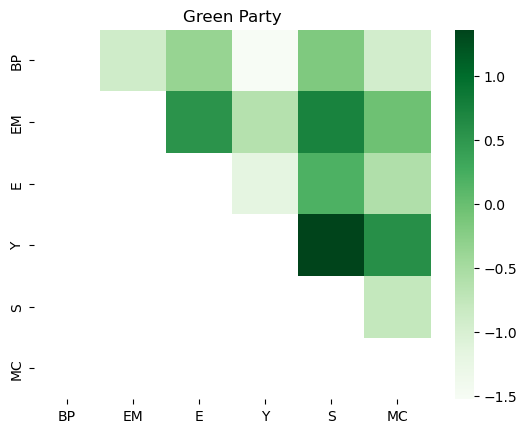

In [64]:
sns.heatmap(party_differences["Grn"].astype(float), cmap="Greens")
plt.title("Green Party")
plt.show()

In [110]:
j = 1
for pred1 in predictors:
    i = j
    for pred2 in predictors[i:]:
        df[f"{pred1}_{pred2}"] = 0
        for party in parties:
            df[f"{pred1}_{pred2}"] += np.abs(df[f"{pred1}_{party}"] - df[f"{pred2}_{party}"])
        i += 1
    j += 1

In [111]:
df["max_diff"] = df.loc[:,"BP_EM":"S_MC"].max(axis=1)

In [112]:
df["mean_diff"] = df.loc[:,"BP_EM":"S_MC"].mean(axis=1)

In [113]:
#pd.options.display.max_columns = None
df.sort_values("mean_diff", ascending=False).head(10)

Constituency BP_Winner  BP_Con  BP_Lab  BP_LDem  BP_Grn  \
598  Stirling and Strathallan       snp    31.5    15.1      3.5     0.2   
590      Na h-Eileanan an Iar       lab    11.1    44.7      2.4     0.0   
264            Leicester East       lab    17.3    55.7      5.6     5.2   
565         East Renfrewshire       snp    25.0    24.7      6.7     0.0   
570            Edinburgh West        ld     8.4    14.3     43.4     0.0   
473          Sutton Coldfield       lab    26.6    29.9     11.7     7.2   
571                   Falkirk       snp    19.0    24.2      6.2     0.0   
134       Dewsbury and Batley       lab    11.7    55.7      4.8     4.7   
615        Dwyfor Meirionnydd        pc    14.1    24.1      3.7     3.4   
593       Orkney and Shetland        ld     4.7    13.5     47.7     0.0   

     BP_SNP  BP_PC  BP_Ref  BP_Other  ...   EM_S  EM_MC   E_Y    E_S  E_MC  \
598    47.2    0.0     2.5       0.0  ...  33.55   48.9  18.0  30.09  41.1   
590    38.4    0.0     1.9       1.5  ...  23.80   68.9  22.0  23.40  60.1   
264     0.0    0.0    12.6       3.6  ...  34.50   65.5  28.0  31.26  61.2   
565    39.2    0.0     2.5       1.9  ...  40.50   25.9  27.0  47.74  21.3   
570    30.9    0.0     1.7       1.3  ...  24.44   29.3  38.0  19.14  32.9   
473     0.0    0.0    20.1       4.5  ...  22.75   17.0  57.0  58.49  55.2   
571    46.5    0.0     2.4       1.8  ...  35.18   19.9  20.0  36.40  25.2   
134     0.0    0.0     9.4      13.7  ...  43.28   45.0  43.0  20.58  22.3   
615     0.0   46.7     7.8       0.2  ...  35.49   49.4  15.0  37.89  42.2   
593    32.2    0.0     2.0       0.0  ...  31.17   37.3  26.0  27.07  35.4   

       Y_S  Y_MC   S_MC max_diff  mean_diff  
598  42.75  53.1  56.19    69.85  39.922000  
590  20.88  78.1  71.96    78.10  38.776000  
264  25.76  51.6  50.12    68.00  37.860000  
565  50.74  41.3  45.68    50.74  35.249333  
570  43.14  69.1  34.22    69.10  35.100000  
473  28.81  13.8  22.83    58.49  34.255333  
571  48.94  33.8  16.28    61.22  33.601333  
134  47.50  50.9  15.58    50.90  33.369333  
615  32.57  41.2  68.97    68.97  33.254000  
593  42.51  18.0  51.71    58.90  33.244667  

[10 rows x 72 columns]

AttributeError: Line2D.set() got an unexpected keyword argument 'edgecolor'

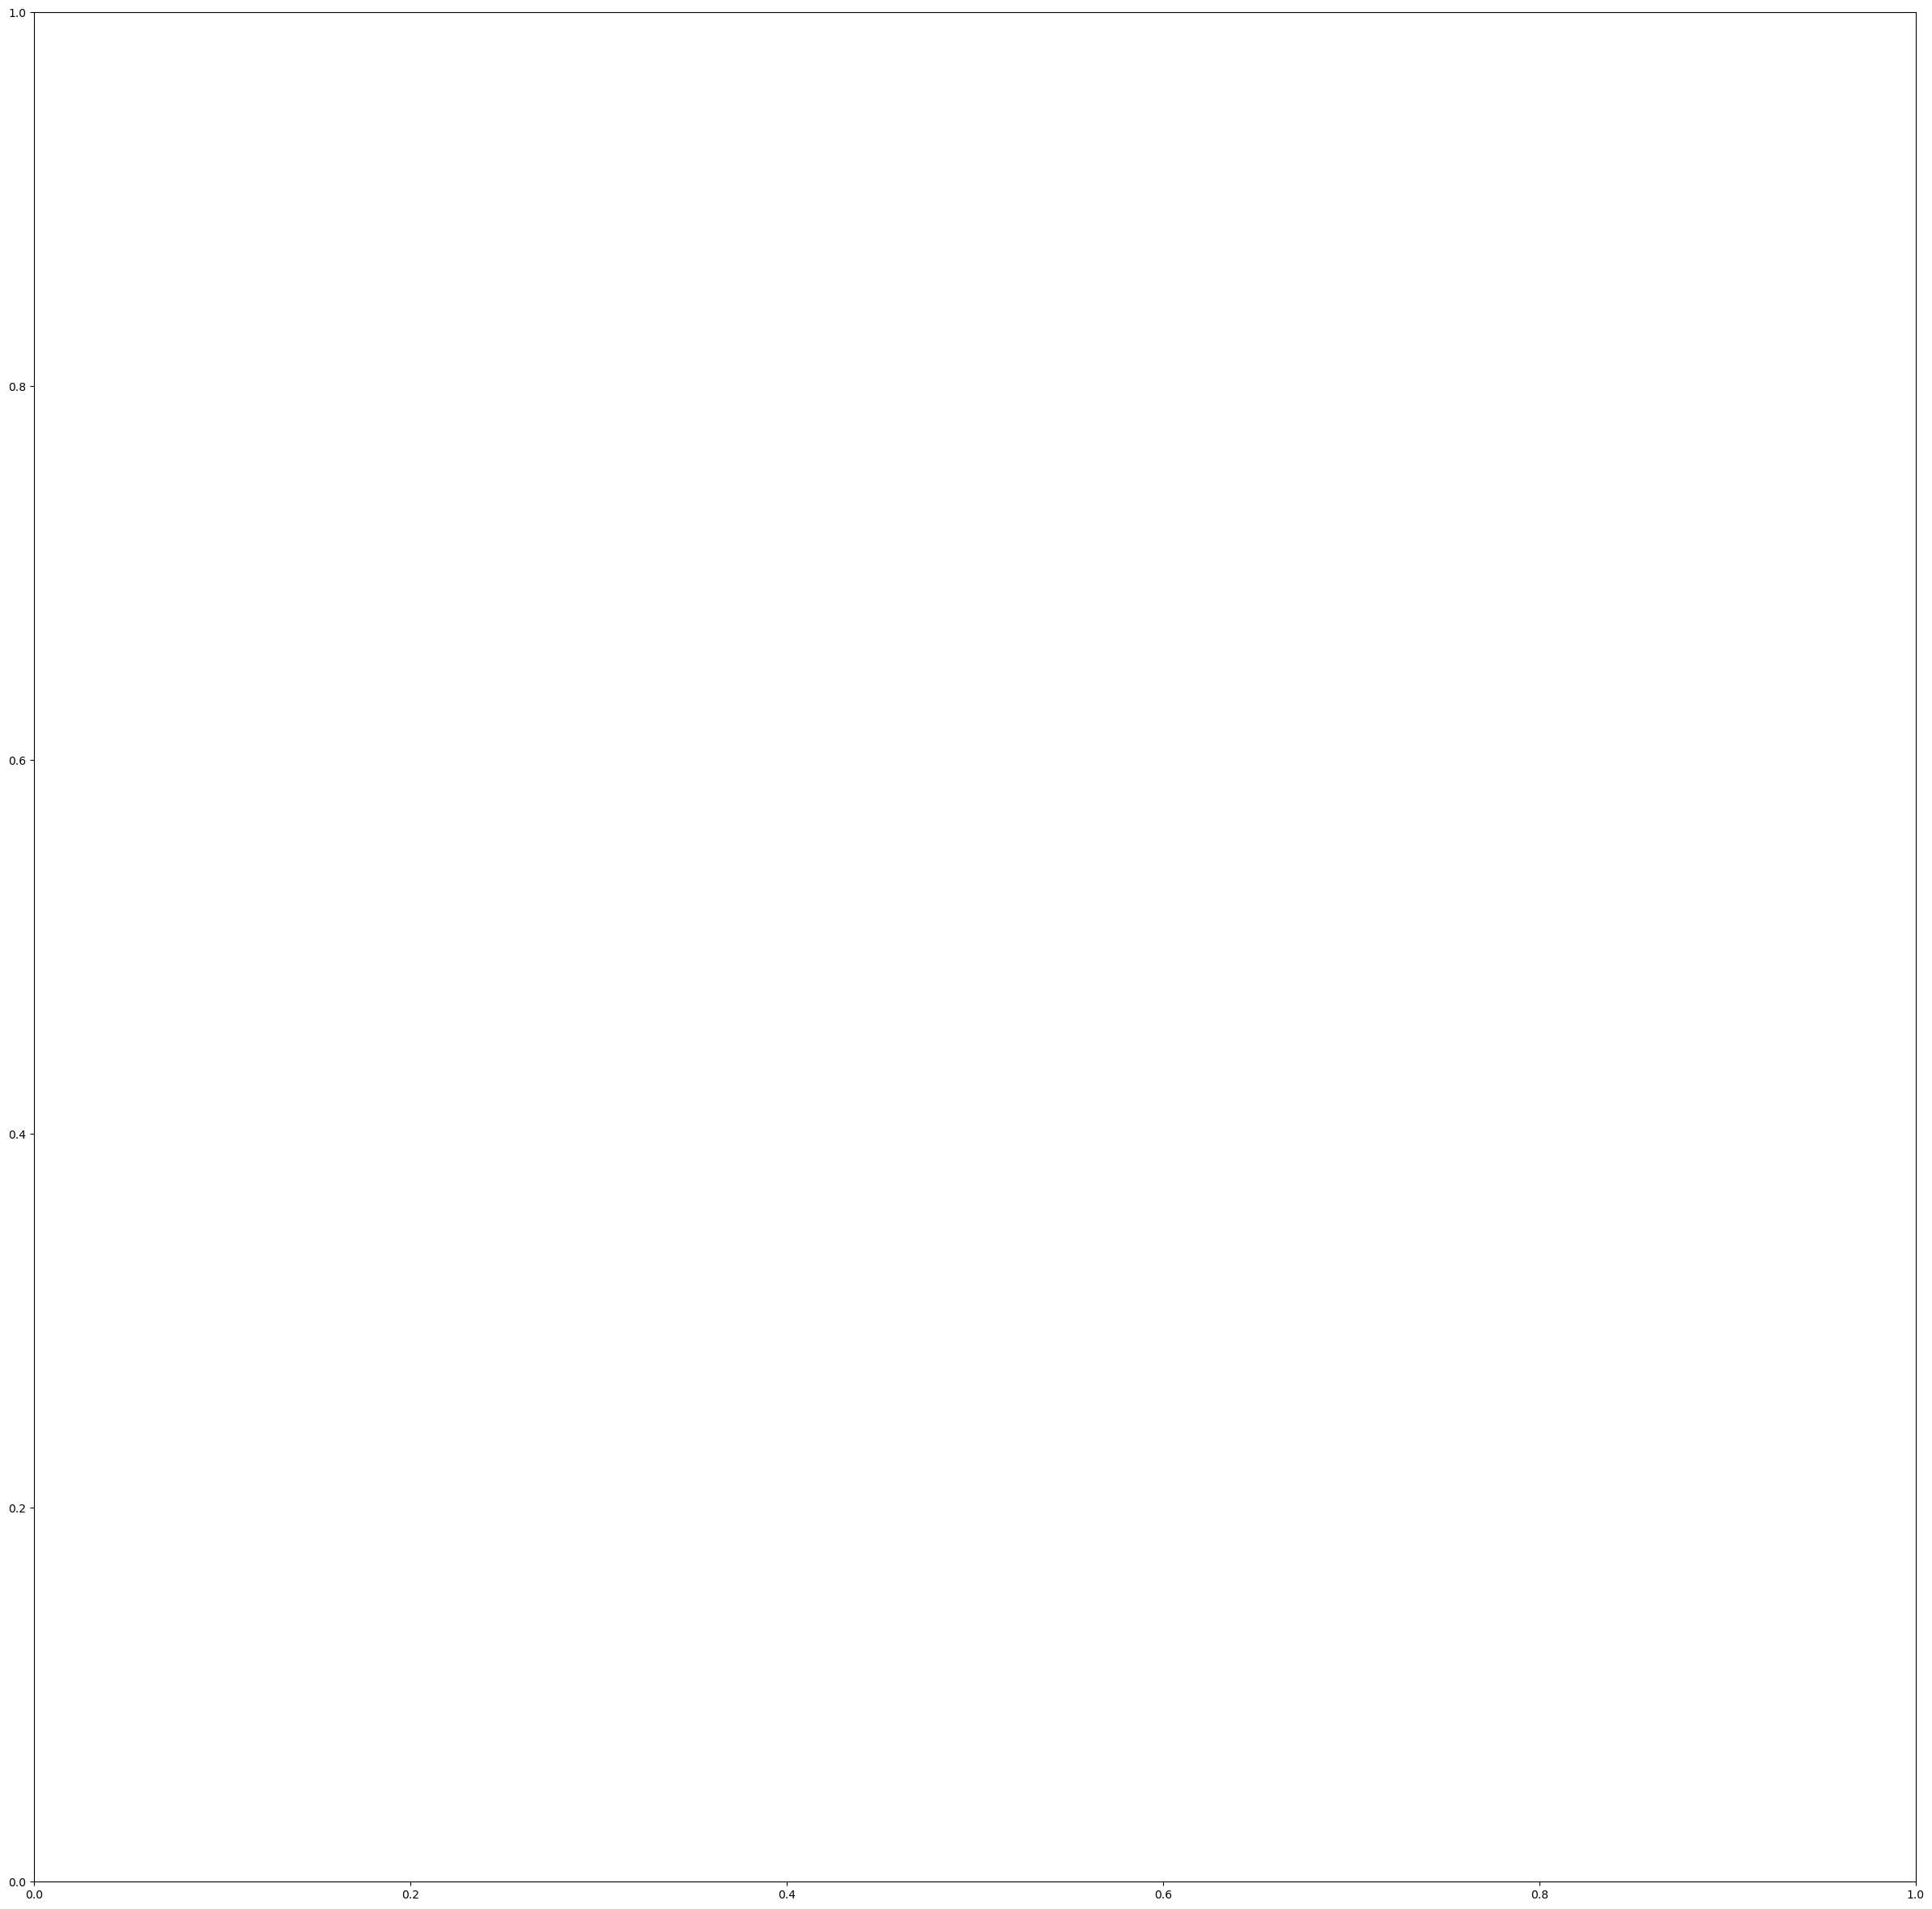

In [114]:
df.plot("max_diff", figsize=(30,30), cmap='Reds', edgecolor="none")

In [74]:
df.sort_values("mean_diff", ascending=False)[["Constituency", "mean_diff"]].head(10)

Constituency  mean_diff
105                Chippenham  40.522667
593  Stirling and Strathallan  39.922000
322            North Cornwall  38.830000
544      Na h-Eileanan an Iar  38.742667
263            Leicester East  37.893333
171        Farnham and Bordon  36.742667
543         East Renfrewshire  35.249333
419           South Cotswolds  35.139333
570            Edinburgh West  35.046667
472          Sutton Coldfield  34.255333

<Axes: >

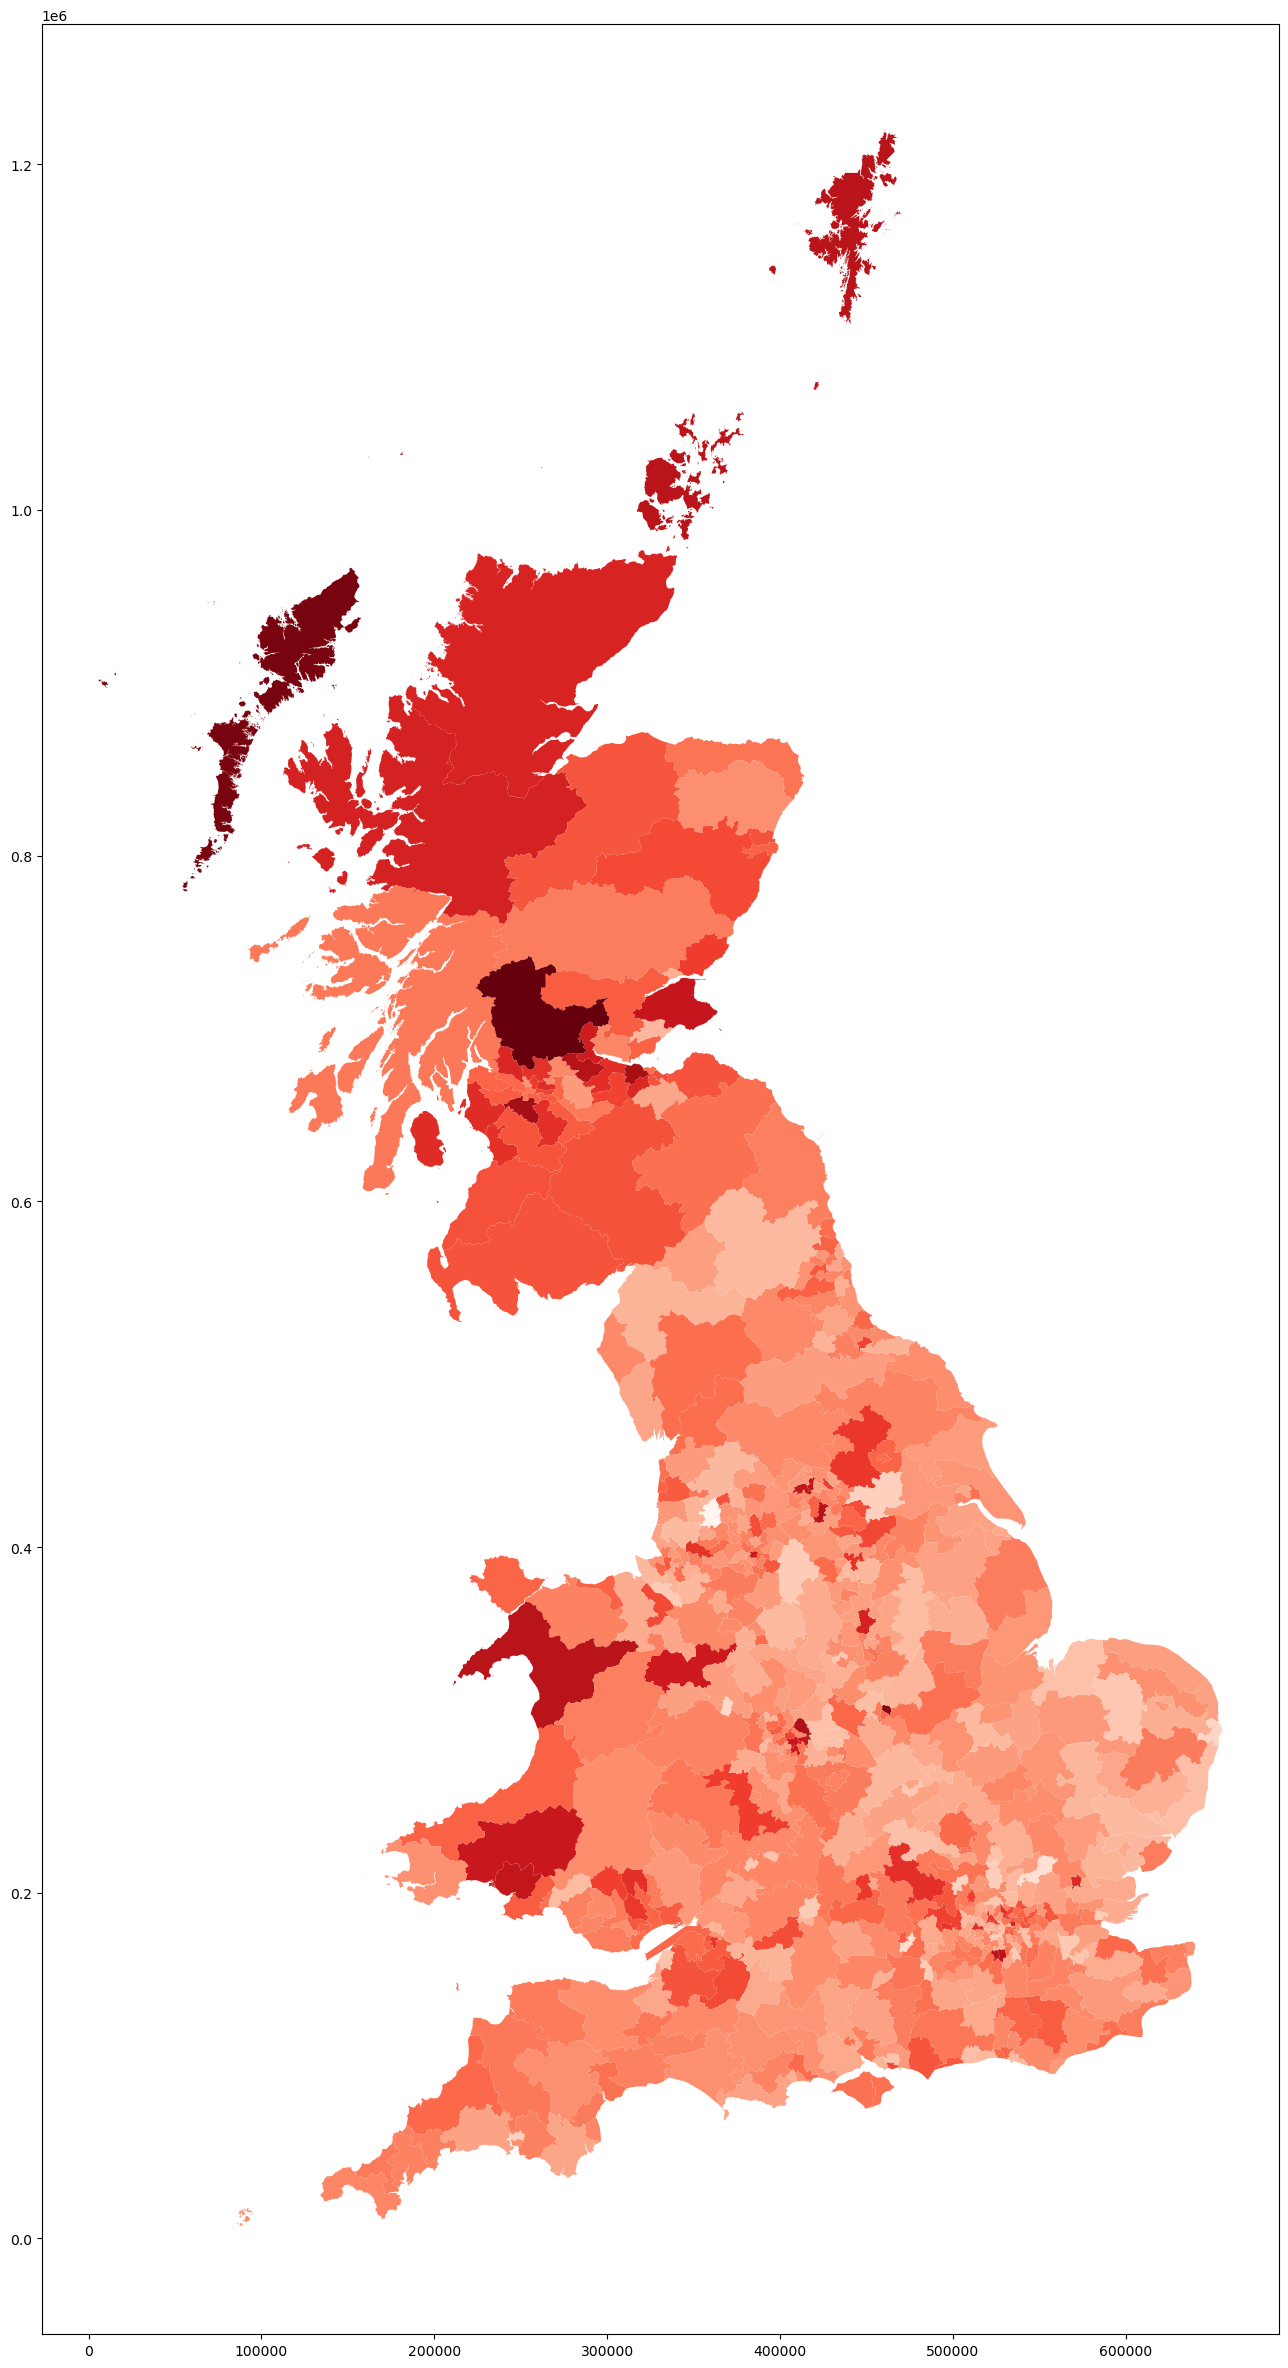

In [117]:
df.plot("mean_diff", figsize=(30,30), cmap='Reds')

In [119]:
for party in parties:
    df[f"mean_{party}"] = (df[f"BP_{party}"] + df[f"EM_{party}"] + df[f"E_{party}"] + df[f"Y_{party}"] + df[f"S_{party}"] + df[f"MC_{party}"]) / 6

In [120]:
df["mean_Winner"] = df.loc[:, "mean_Con":].idxmax(axis=1).str.split("_").str[1].map({"Lab":"lab", "Con": "con", "Ref":"ref", "LDem":"ld", "Grn":"grn", "SNP":"snp", "PC":"pc", "Other":"other"})

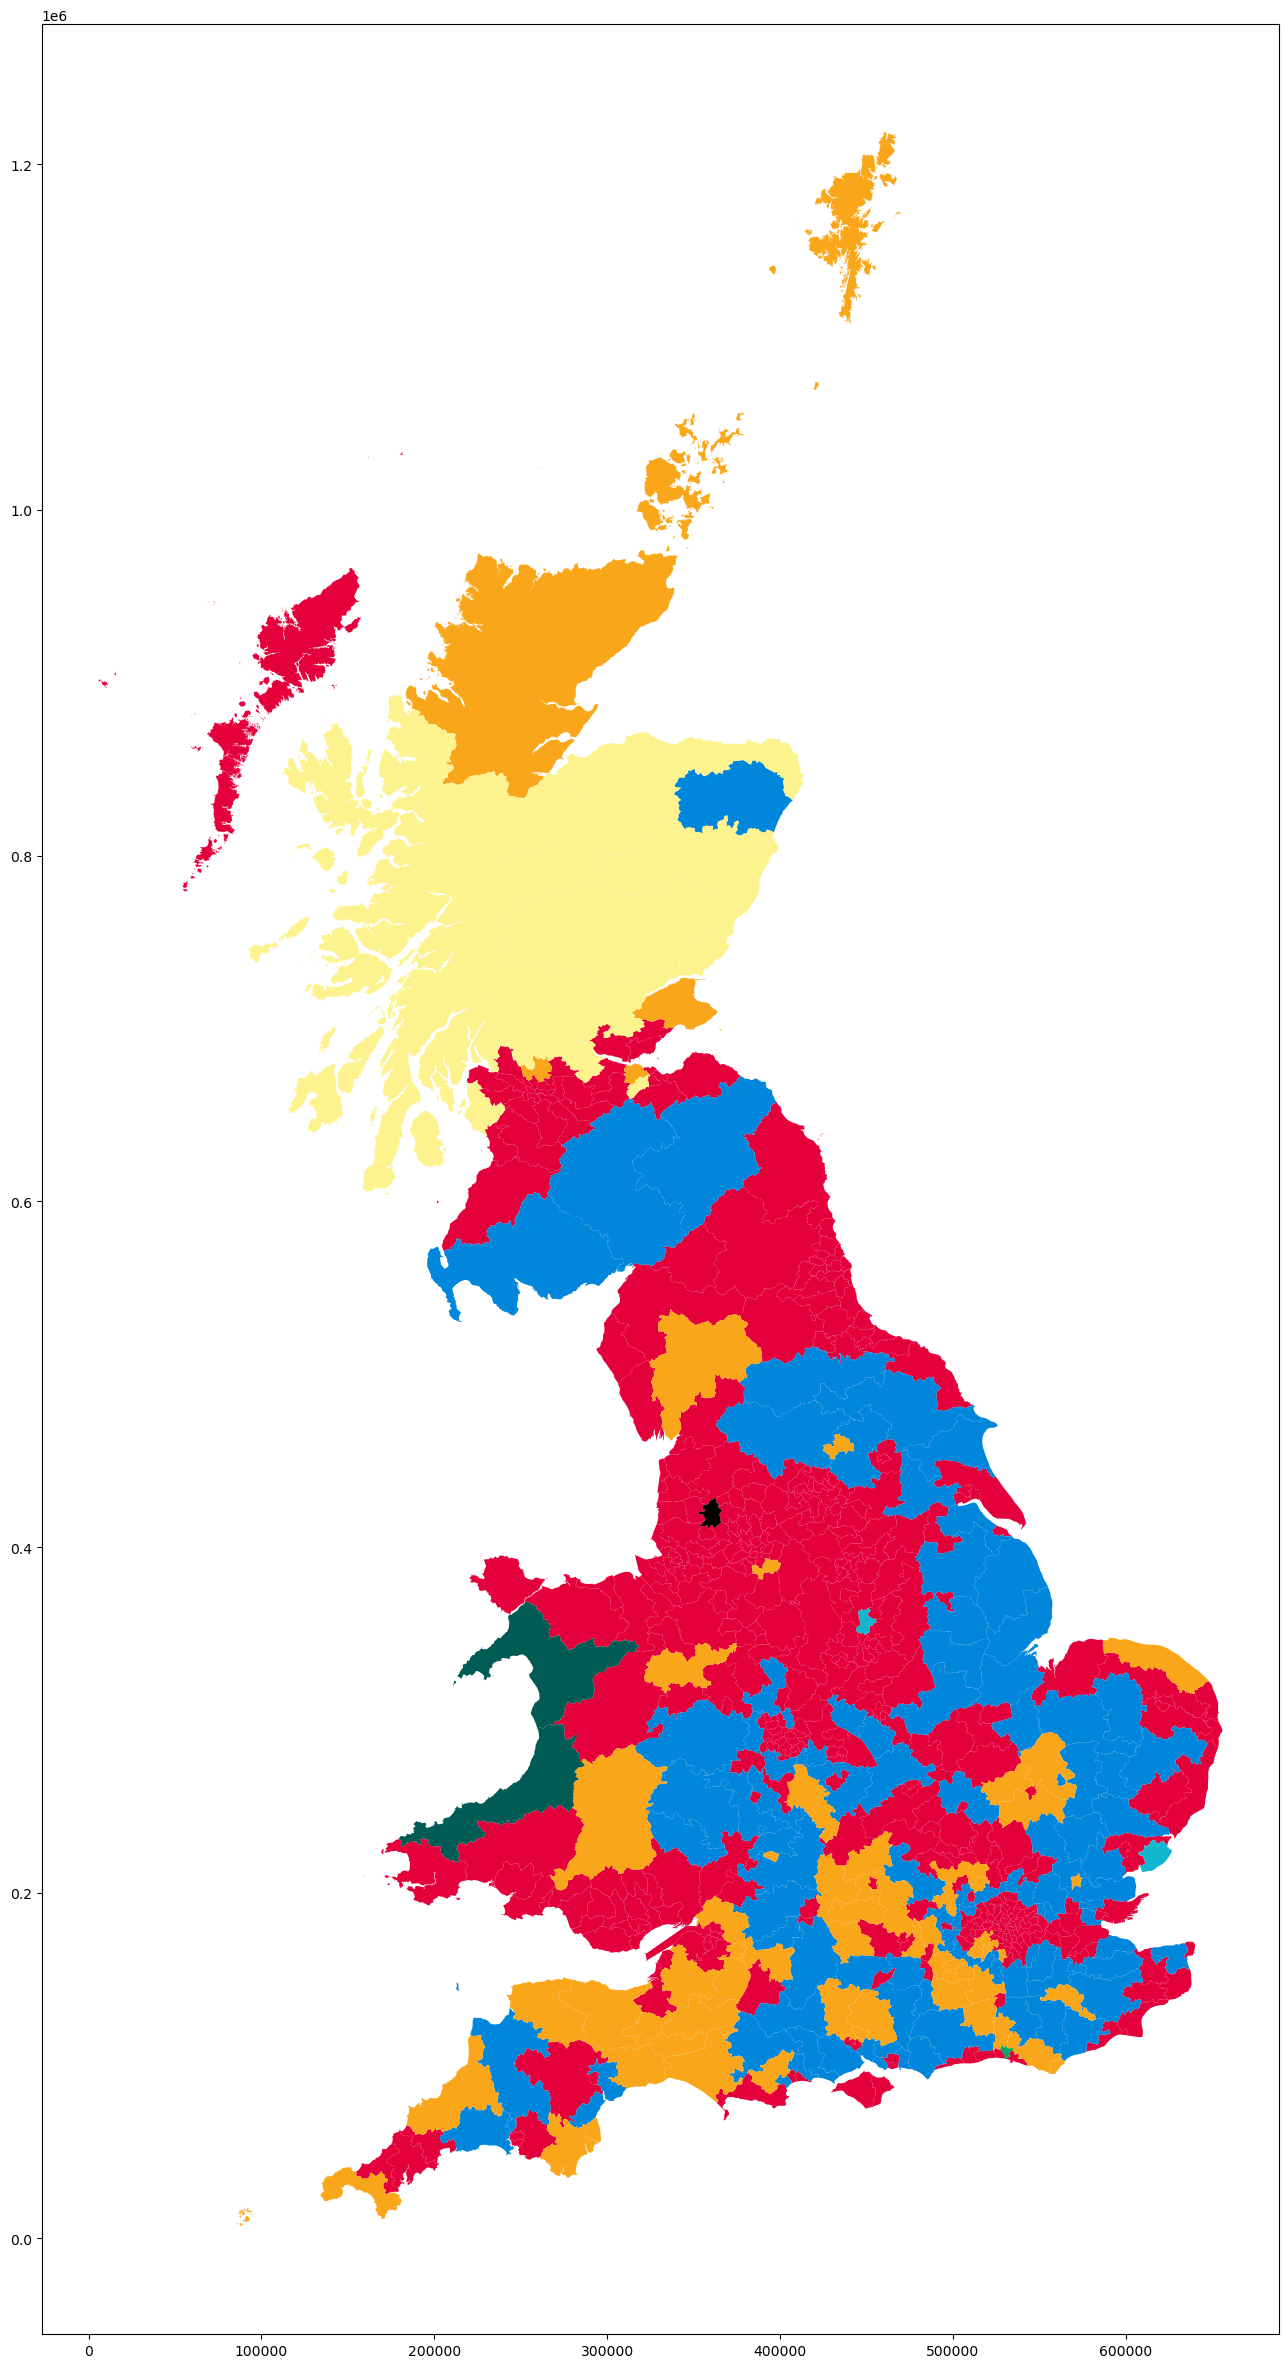

In [78]:
ax = df.plot(figsize=(30,30), color="none", edgecolor="none")
for party in df["mean_Winner"].unique():
    df[df["mean_Winner"] == party].plot(ax=ax, color=party_colours[party])

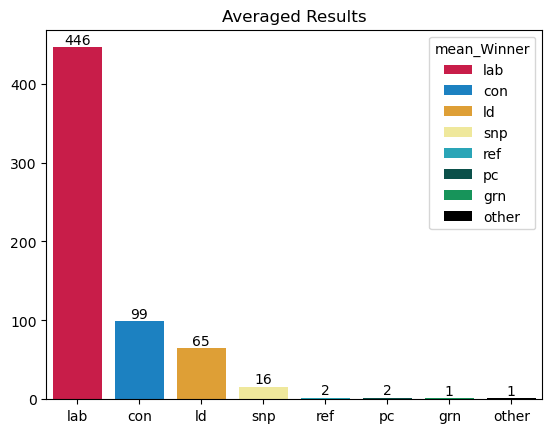

In [79]:
colours = sns.color_palette(list(party_colours.values()))
ordered_colours = {}
for party in df["mean_Winner"].value_counts().index:
    ordered_colours[party] = party_colours[party]

ax = sns.barplot(y=df["mean_Winner"].value_counts().values, x=list(df["mean_Winner"].value_counts().index), hue=df["mean_Winner"].value_counts().index, palette=ordered_colours, legend="full")
ax.set_title("Averaged Results")

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

In [18]:
gdf = gpd.read_file("Full Constituency Data.gpkg")

In [115]:
df = pd.merge(gdf, df, left_on="constituency", right_on="Constituency")

In [123]:
df.drop(columns="geometry").to_csv("All Predictions.csv")

In [122]:
"geometry" in list(df.columns)

True